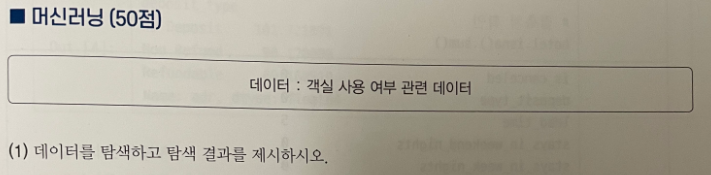

In [1]:
import pandas as pd
df_h_raw = pd.read_csv('./data/hotel_bookings.csv')
df_h_raw.head(3)

is_canceled deposit_type  lead_time  stays_in_weekend_nights  \
0            0   No Deposit      105.0                        2   
1            0   No Deposit      303.0                        2   
2            0   No Deposit       33.0                        2   

   stays_in_week_nights  is_repeated_guest  previous_cancellations  \
0                     5                NaN                       0   
1                     2                NaN                       0   
2                     3                0.0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                1                     0   
1                               0                0                     0   
2                               0                0                     0   

      adr  
0  131.50  
1   73.95  
2     NaN

In [2]:
df_h = df_h_raw.copy()
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


* 총 2만개의 행, 11개의 컬럼을 가진 데이터 존재
* deposit_type는 범주형 변수이며, 이를 제외한 모든 데이터는 수치형 데이터를 지닌 변수
* 11개의 변수 중 lead_time, is_repeated_guest, adr 총 3개의 변수에 결측값 존재

In [3]:
desc_c = df_h.describe()
desc_c

is_canceled     lead_time  stays_in_weekend_nights  \
count  20000.00000  19995.000000             20000.000000   
mean       0.12000     85.978345                 0.892550   
std        0.32497     96.427240                 0.952077   
min        0.00000      0.000000                 0.000000   
25%        0.00000     11.000000                 0.000000   
50%        0.00000     51.000000                 1.000000   
75%        0.00000    132.000000                 2.000000   
max        1.00000    629.000000                13.000000   

       stays_in_week_nights  is_repeated_guest  previous_cancellations  \
count          20000.000000       19642.000000            20000.000000   
mean               2.380400           0.038133                0.032900   
std                1.777345           0.191521                0.455552   
min                0.000000           0.000000                0.000000   
25%                1.000000           0.000000                0.000000   
50%                2.000000           0.000000                0.000000   
75%                3.000000           0.000000                0.000000   
max               30.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    20000.000000     20000.000000          20000.000000   
mean                         0.169050         0.269400              1.983950   
std                          1.502426         0.687566             15.927212   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         66.000000        17.000000            379.000000   

                adr  
count  18937.000000  
mean     101.410239  
std       49.245097  
min       -6.380000  
25%       68.800000  
50%       94.500000  
75%      126.000000  
max      451.500000

In [4]:
print('is_canceled : ' ,df_h['is_canceled'].unique())
print('is_repeated_guest : ' ,df_h['is_repeated_guest'].unique())

is_canceled :  [0 1]
is_repeated_guest :  [nan  0.  1.]


* 'is_canceled'와 'is_repeated_guest'는 수치형 변수로 표현되어 있지만 사실상 범주 형태의 변수(여부)
* 'lead_time', 'days_in_waiting_list', 'adr' 변수는 다른 변수보다 단위와 분산이 크므로 추후 스케일링 처리 필요

변수 :  lead_time
(IQR)이상치 개수 :  732

(sigma)이상치 개수 :  350
정규성 검정, 통계량 : 0.1863, p-value : 0.0


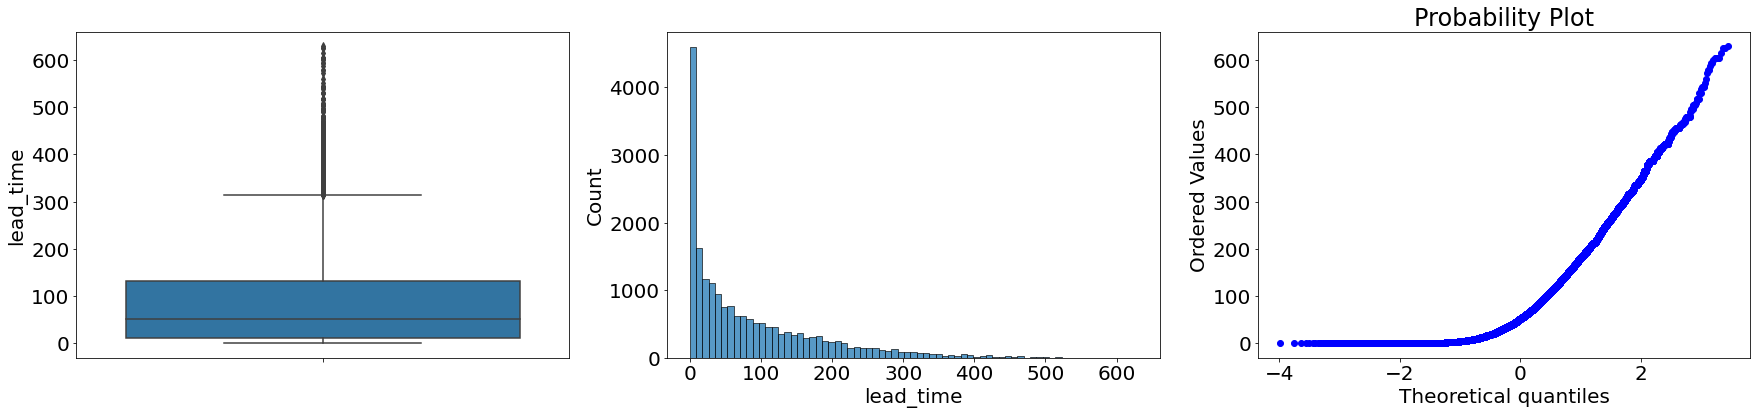

변수 :  stays_in_weekend_nights
(IQR)이상치 개수 :  29

(sigma)이상치 개수 :  271
정규성 검정, 통계량 : 0.2672, p-value : 0.0


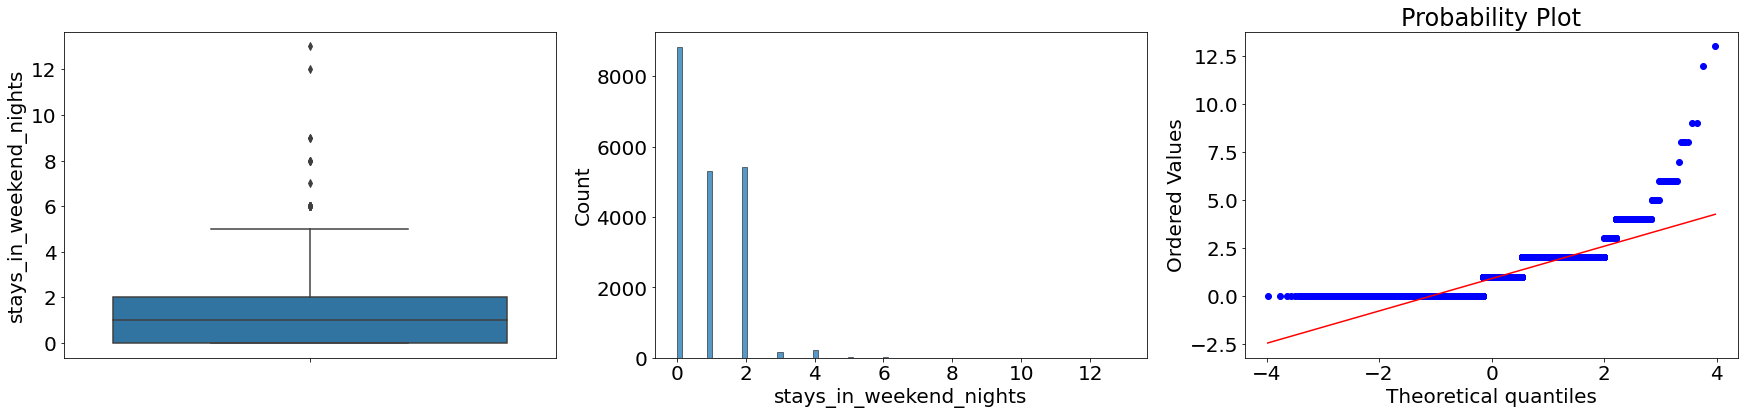

변수 :  stays_in_week_nights
(IQR)이상치 개수 :  446

(sigma)이상치 개수 :  274
정규성 검정, 통계량 : 0.1999, p-value : 0.0


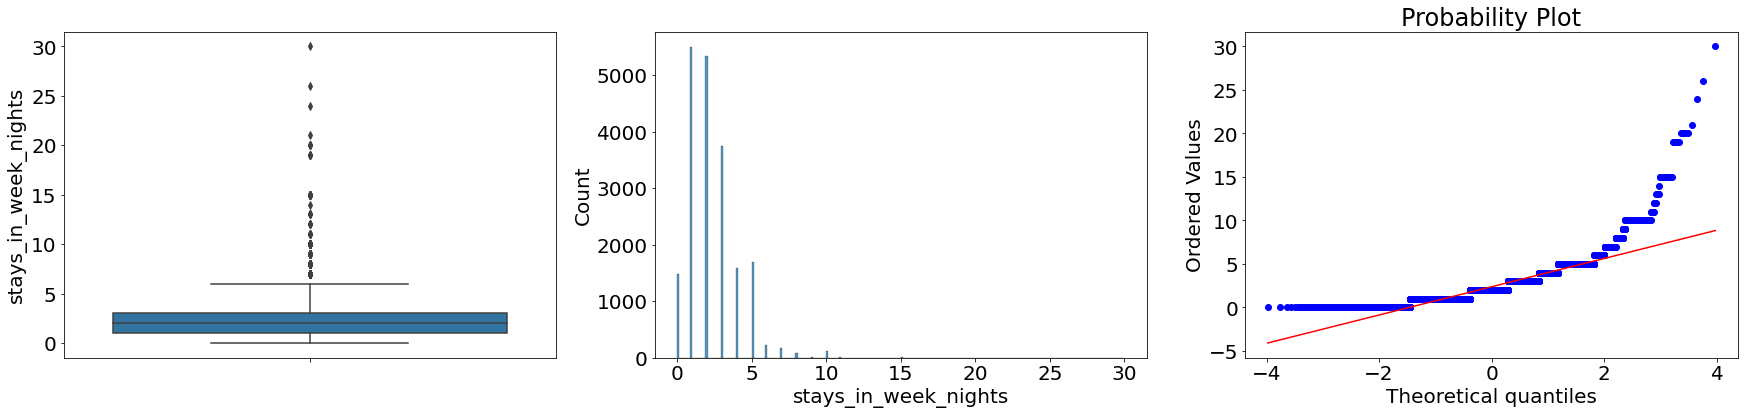

변수 :  previous_cancellations
(IQR)이상치 개수 :  401

(sigma)이상치 개수 :  51
정규성 검정, 통계량 : 0.5087, p-value : 0.0


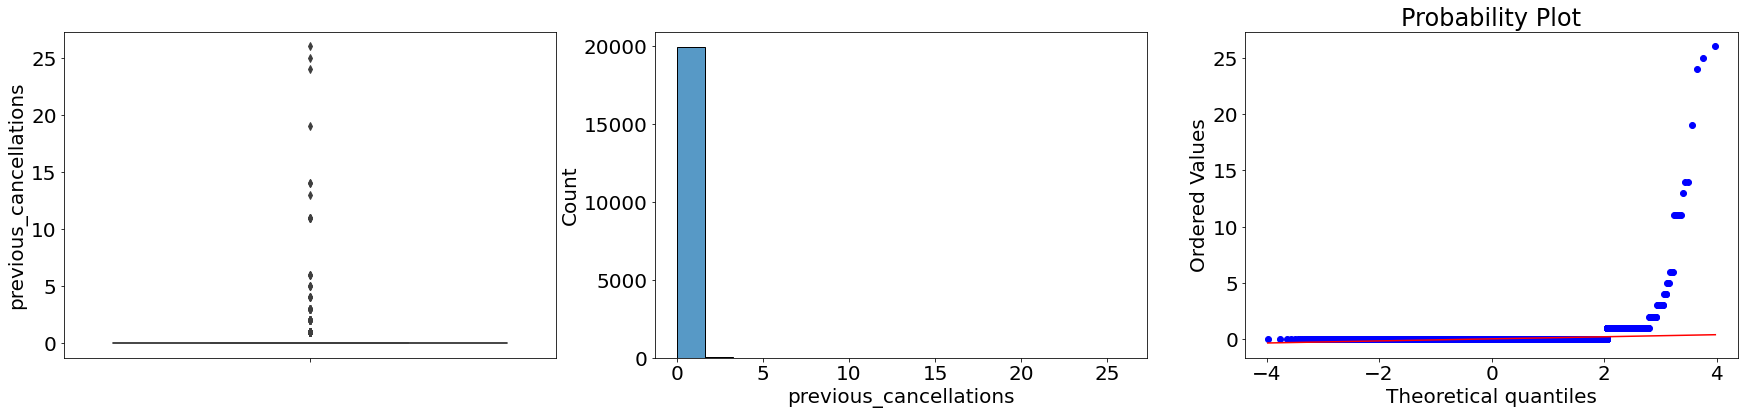

변수 :  previous_bookings_not_canceled
(IQR)이상치 개수 :  786

(sigma)이상치 개수 :  204
정규성 검정, 통계량 : 0.5055, p-value : 0.0


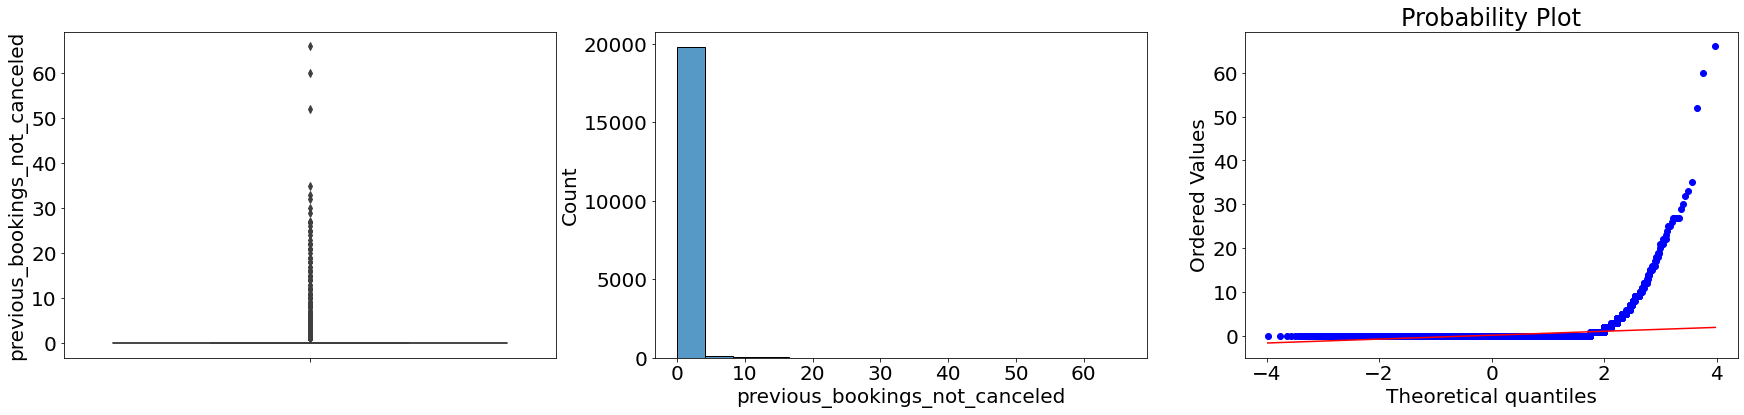

변수 :  booking_changes
(IQR)이상치 개수 :  3769

(sigma)이상치 개수 :  306
정규성 검정, 통계량 : 0.464, p-value : 0.0


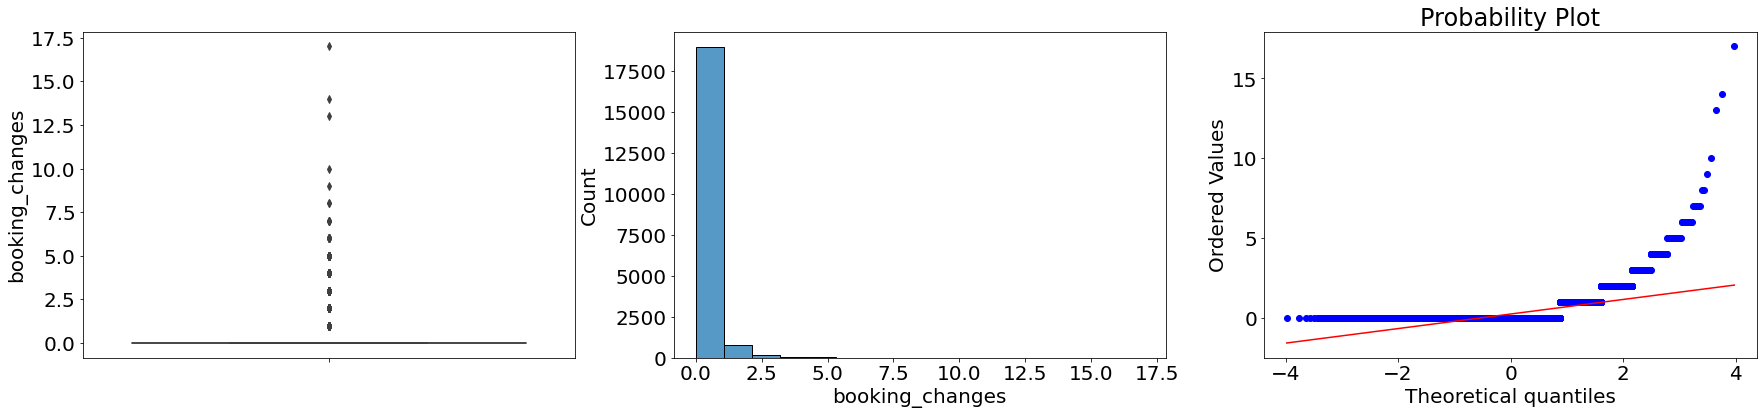

변수 :  days_in_waiting_list
(IQR)이상치 개수 :  487

(sigma)이상치 개수 :  320
정규성 검정, 통계량 : 0.5252, p-value : 0.0


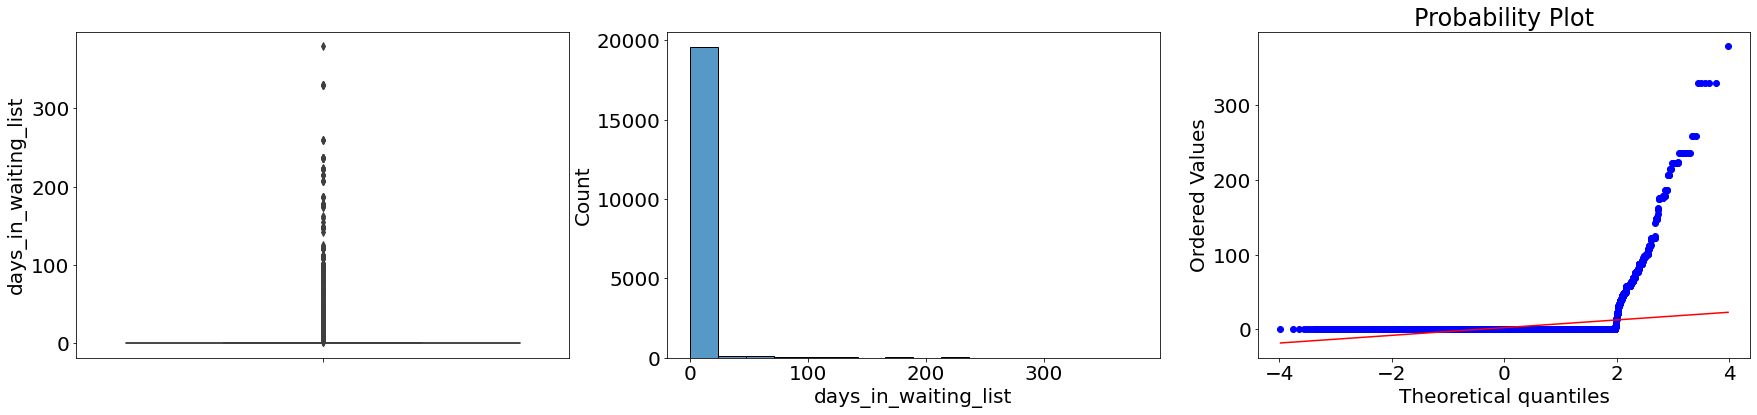

변수 :  adr
(IQR)이상치 개수 :  611

(sigma)이상치 개수 :  215
정규성 검정, 통계량 : 0.0784, p-value : 0.0


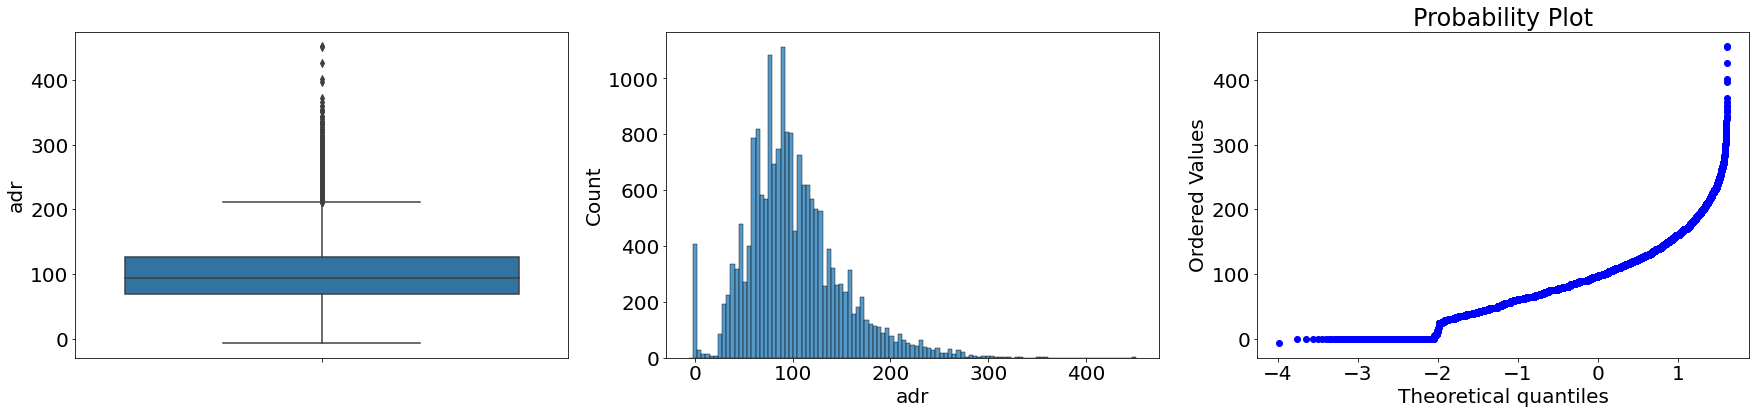

In [5]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


continuous_columns = desc_c.drop(['is_canceled','is_repeated_guest'], axis = 1).columns

for col in continuous_columns :
    X_col = df_h[col].copy()
    #X_col = np.log1p(X_col)
    print('변수 : ', col)

    # 1.1 이상치 확인 - 1.5 * IQR
    q1 = X_col.quantile(0.25)
    q3 = X_col.quantile(0.75)
    outlier_iqr_over = q3 + 1.5*(q3-q1)
    outlier_iqr_under = q1 - 1.5*(q3-q1)
    outliers_iqr = X_col[(X_col > outlier_iqr_over) | (X_col < outlier_iqr_under)]
    print('(IQR)이상치 개수 : ', len(outliers_iqr))
    #print('(IQR)이상치 : \n', outliers_iqr.value_counts())

    # 1.2 이상치 확인 - 3 * Sigma
    sigma = np.std(X_col)
    mu = np.mean(X_col)
    outlier_sigma_over = mu + 3*sigma
    outlier_sigma_under = mu - 3*sigma
    outlier_sigma = X_col[(X_col > outlier_sigma_over) | (X_col < outlier_sigma_under)]
    print('\n(sigma)이상치 개수 : ', len(outlier_sigma))
    #print('(sigma)이상치 : \n', outlier_sigma.value_counts())

    # 2.2 정규성 확인 : 콜모고로프-스미노프 검정
    test_stat, p_val = stats.kstest(X_col.dropna(), 'norm', args=(mu, sigma)) #null 값이 있으면 검정통계량 미출력
    print('정규성 검정, 통계량 : {}, p-value : {}'.format(round(test_stat, 4), round(p_val, 4)))

    plt.figure(figsize = (30, 6))
    plt.rc('font', size = 20)

    # 1.3 이상치 & 분포 확인 : Box Plot 
    plt.subplot(1, 3, 1)
    sns.boxplot(y = X_col)

    # 1.4 이상치 & 분포 확인 : distplot( seaborn 버전 때문에 안되면 histplot으로 )
    plt.subplot(1, 3, 2)
    sns.histplot(x = X_col)

    # 2.1 정규성 확인 : Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(X_col, dist=stats.norm, plot = plt)

    plt.show()

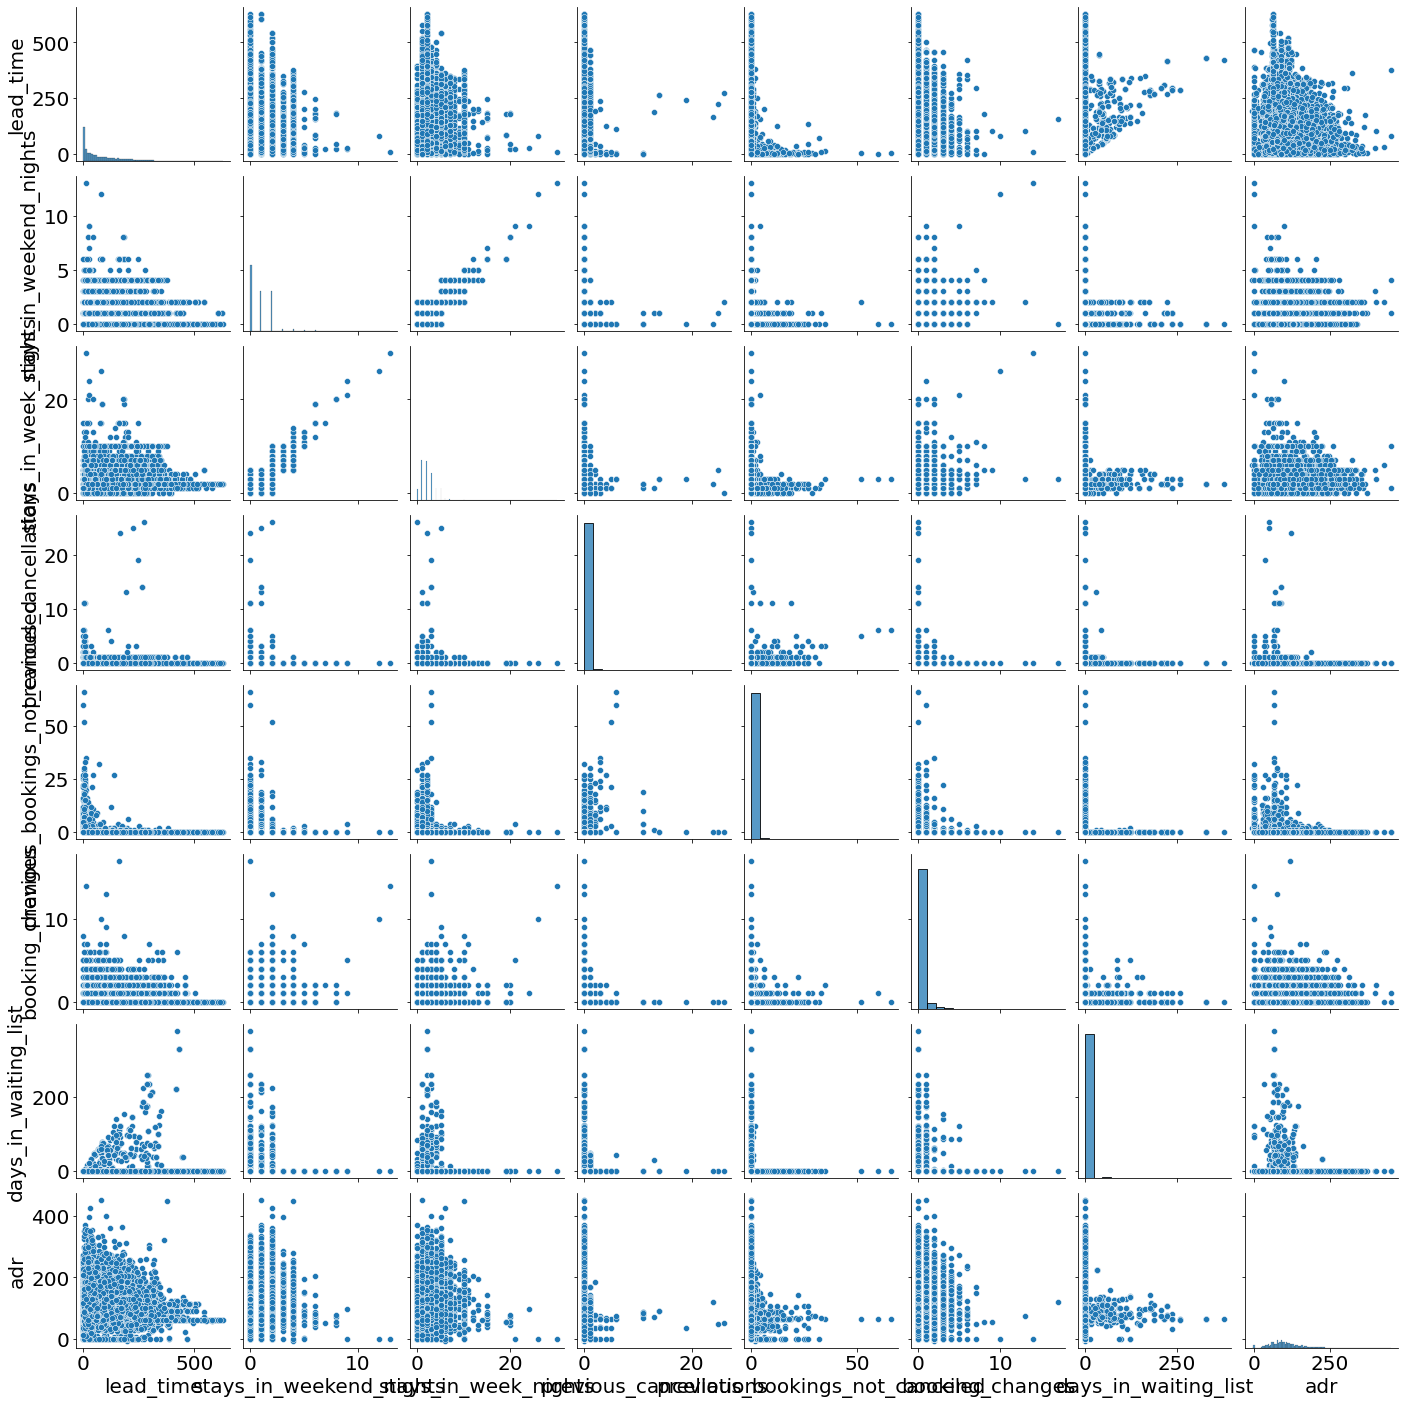

C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


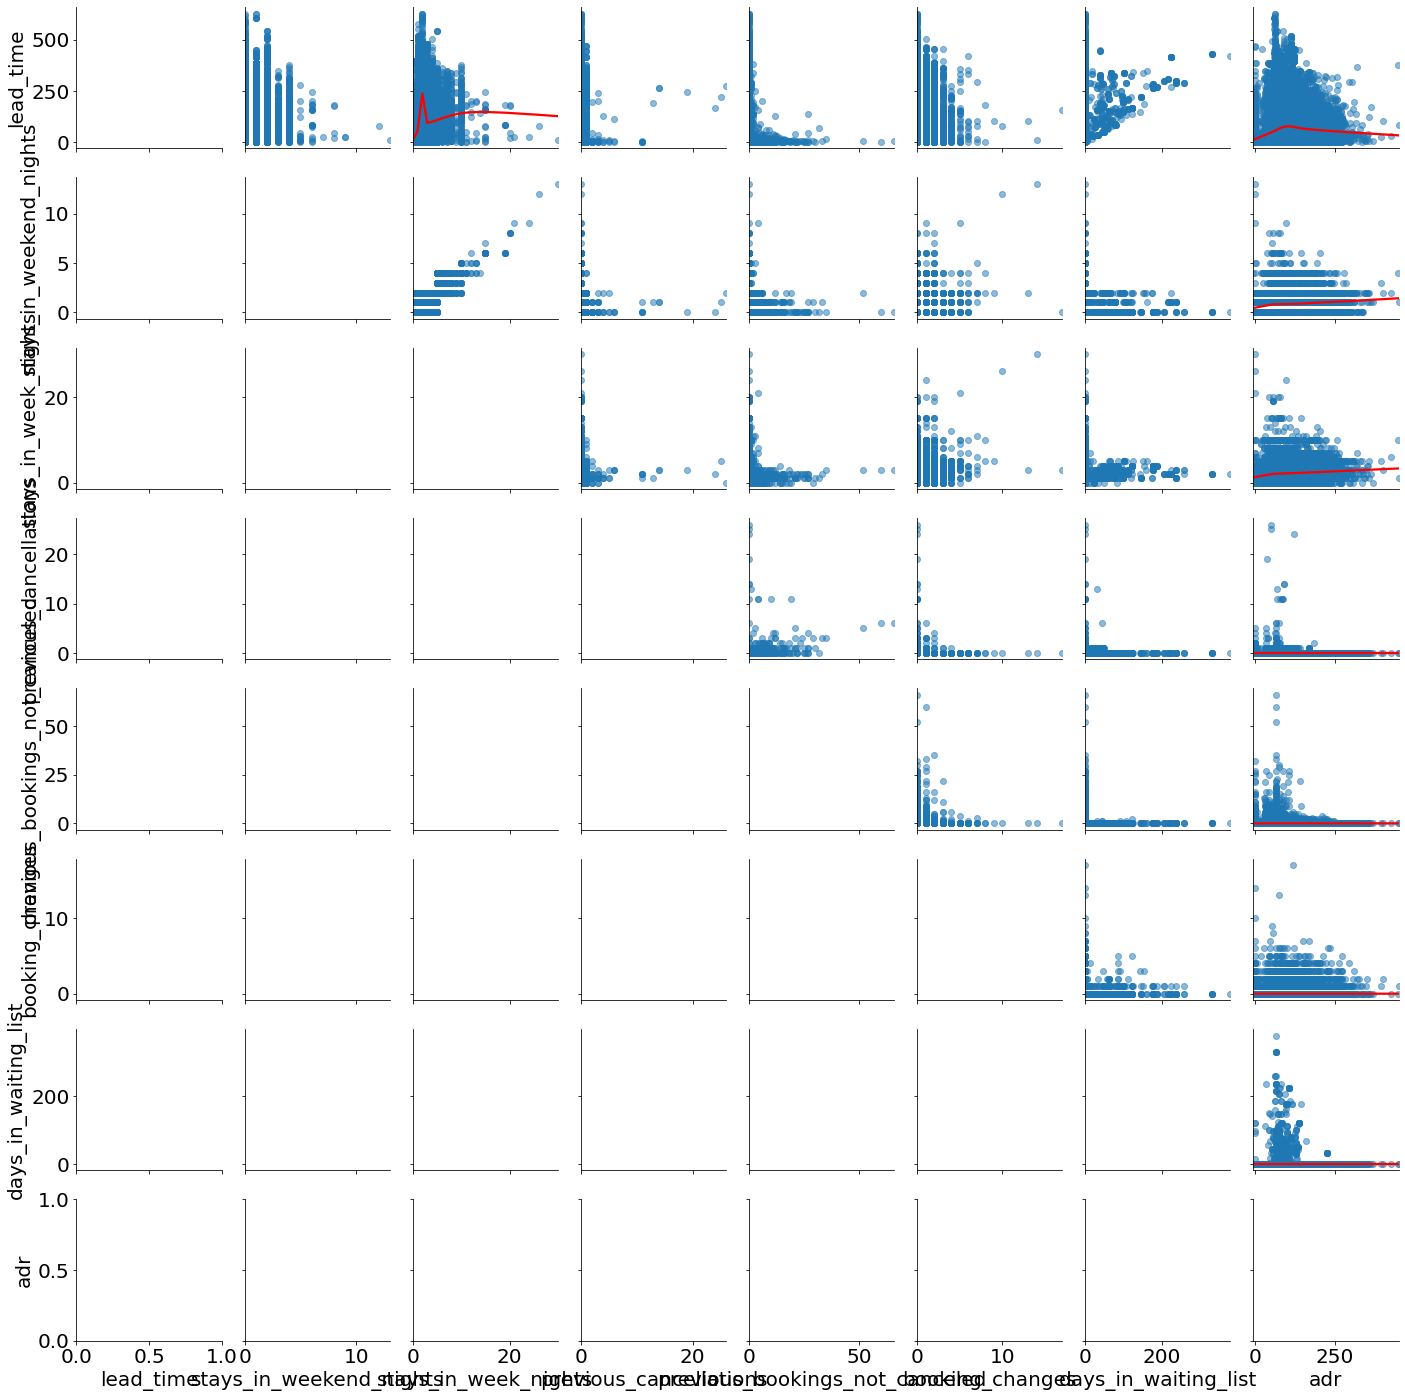

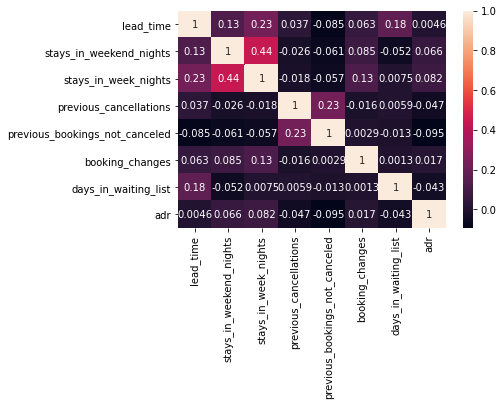

lead_time  stays_in_weekend_nights  \
lead_time                        1.000000                 0.131610   
stays_in_weekend_nights          0.131610                 1.000000   
stays_in_week_nights             0.226925                 0.441038   
previous_cancellations           0.037077                -0.025513   
previous_bookings_not_canceled  -0.084856                -0.061303   
booking_changes                  0.063283                 0.084553   
days_in_waiting_list             0.177946                -0.051947   
adr                              0.004552                 0.066047   

                                stays_in_week_nights  previous_cancellations  \
lead_time                                   0.226925                0.037077   
stays_in_weekend_nights                     0.441038               -0.025513   
stays_in_week_nights                        1.000000               -0.018175   
previous_cancellations                     -0.018175                1.000000   
previous_bookings_not_canceled             -0.056684                0.229454   
booking_changes                             0.127514               -0.016326   
days_in_waiting_list                        0.007527                0.005882   
adr                                         0.082152               -0.047085   

                                previous_bookings_not_canceled  \
lead_time                                            -0.084856   
stays_in_weekend_nights                              -0.061303   
stays_in_week_nights                                 -0.056684   
previous_cancellations                                0.229454   
previous_bookings_not_canceled                        1.000000   
booking_changes                                       0.002864   
days_in_waiting_list                                 -0.012823   
adr                                                  -0.094552   

                                booking_changes  days_in_waiting_list  \
lead_time                              0.063283              0.177946   
stays_in_weekend_nights                0.084553             -0.051947   
stays_in_week_nights                   0.127514              0.007527   
previous_cancellations                -0.016326              0.005882   
previous_bookings_not_canceled         0.002864             -0.012823   
booking_changes                        1.000000              0.001281   
days_in_waiting_list                   0.001281              1.000000   
adr                                    0.016739             -0.042662   

                                     adr  
lead_time                       0.004552  
stays_in_weekend_nights         0.066047  
stays_in_week_nights            0.082152  
previous_cancellations         -0.047085  
previous_bookings_not_canceled -0.094552  
booking_changes                 0.016739  
days_in_waiting_list           -0.042662  
adr                             1.000000

In [44]:
# 1. 산점도 & 분포
sns.pairplot(df_h[continuous_columns])
plt.show()

# 2. 회귀 : 한번에
g = sns.PairGrid(df_h[continuous_columns])
g.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.show()

# 3. 상관분석
plt.rc('font', size = 10)
sns.heatmap(df_h[continuous_columns].corr(), annot = True)
plt.show()

df_h[continuous_columns].corr(method = 'pearson')  # 피어슨(default)
# X[continuous_columns].corr(method = 'spearman') # 스피어만 - 순서척도

In [6]:
desc_o = df_h.describe(include = 'O')
desc_o

deposit_type
count         20000
unique            3
top      No Deposit
freq          19138

In [7]:
print('deposit_type : ' ,df_h['deposit_type'].unique())

deposit_type :  ['No Deposit' 'Refundable' 'Non Refund']


변수 :  deposit_type
No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64


C:\Users\chaeyoung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


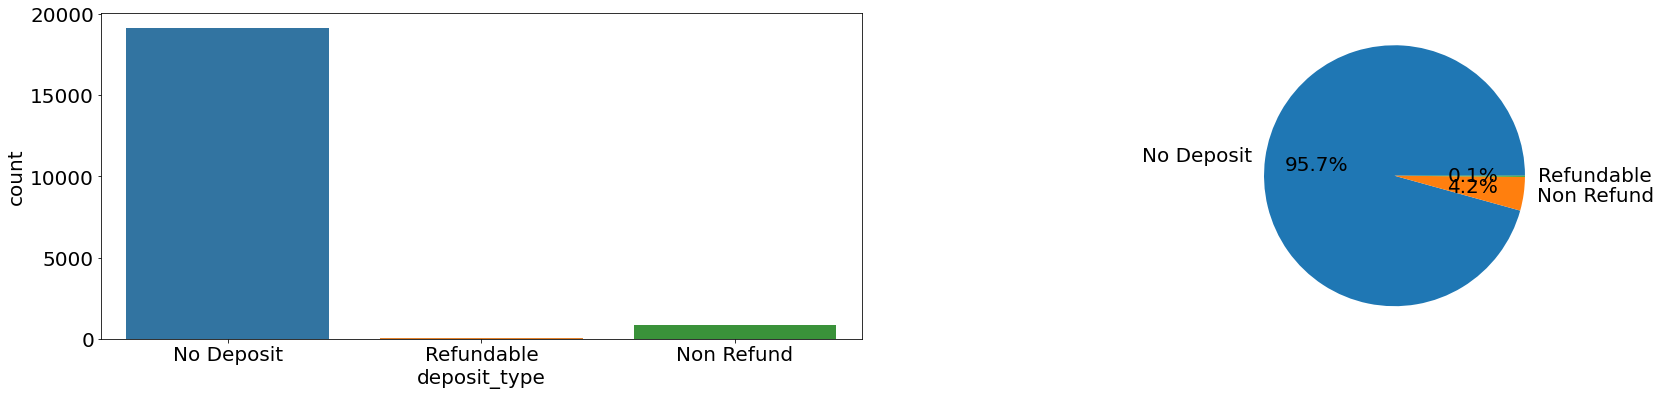

변수 :  is_canceled
0    17600
1     2400
Name: is_canceled, dtype: int64


C:\Users\chaeyoung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


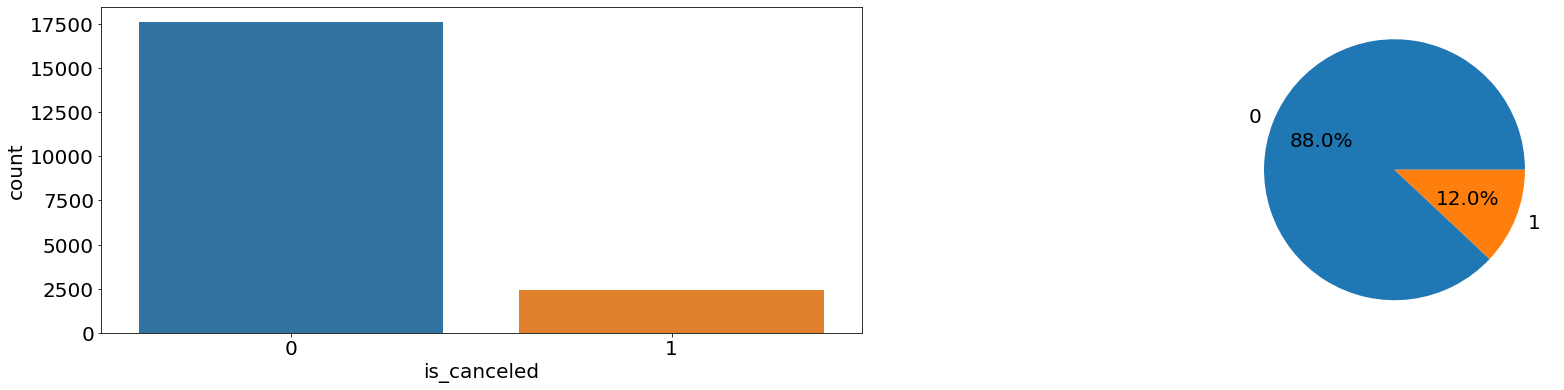

변수 :  is_repeated_guest
0.0    18893
1.0      749
Name: is_repeated_guest, dtype: int64


C:\Users\chaeyoung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


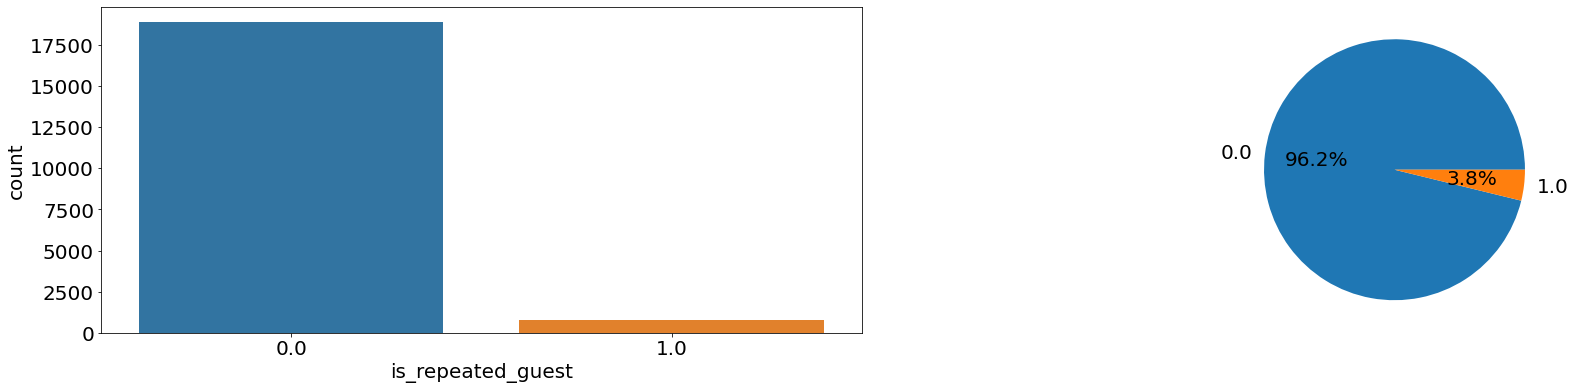

In [8]:
categorical_columns = ['deposit_type', 'is_canceled', 'is_repeated_guest']

for col in categorical_columns:
    X_col = df_h[col].copy()
    print('변수 : ', col)
    
    # 1.1 범주의 개수
    vc = X_col.value_counts()
    print(vc)
    
    plt.figure(figsize = (30, 6))
    plt.rc('font', size = 20)

    # 1.2  범주별 도수 : countplot
    plt.subplot(1, 2, 1)
    sns.countplot(X_col)
    
    # 1.3  범주의 비율 : Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(vc.values, labels=vc.index, autopct='%.1f%%')

    plt.show()

In [9]:
df_h['deposit_type'].value_counts()

No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64

In [10]:
dt_1 = df_h['deposit_type'].value_counts()[0]/20000
dt_2 = df_h['deposit_type'].value_counts()[1]/20000
dt_3 = df_h['deposit_type'].value_counts()[2]/20000

print('No Deposit : {:2.2%}'.format(dt_1))
print('Non Refund : {:2.2%}'.format(dt_2))
print('Refundable : {:2.2%}'.format(dt_3))

No Deposit : 95.69%
Non Refund : 4.17%
Refundable : 0.14%


* 'deposit_type'의 경우, 'No Deposit' 'Refundable' 'Non Refund' 총 3개의 데이터로 구성
* 그 중, 'No Deposit'(19,138) > 'Non Refund'(834) > 'Refundable'(28) 순으로 데이터의 비중이 크며, Deposit이 있는 값들이 극소수를 차지(약 4.3%)하므로 추후 오버샘플링을 통해 데이터 클래스의 밸런스를 맞출 필요 존재

In [46]:
import scipy.stats

target = df_h['deposit_type'].copy()

for col in continuous_columns:
    X_col = df_h[col].copy()
    print('변수 : ', col, ' & target')
# 검정
# 범주 2개: t검정 / Mann-Whitney 검정
# 범주 3개 : anova / 크루스칼 왈리스 검정(Kruskal-Wallis test)
    if len(X_col.unique()) == 2:
    elif len(X_col.unique()) > 2:



# 1.2 범주별 히스토그램, boxplot, barplot(평균)
    sns.subplot(1, 1, 1)
    sns.boxplot(y = X_col, x = target)

IndentationError: expected an indented block (<ipython-input-46-5bc083937169>, line 12)

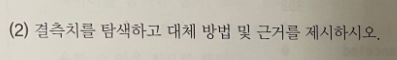

In [11]:
df_h = df_h_raw.copy()
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [12]:
df_h_dum = pd.get_dummies(df_h, columns = ['deposit_type'])

In [13]:
#!conda install -c conda-forge imbalanced-learn -y

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df_h_dum)
df_filled = pd.DataFrame(df_filled, columns = df_h_dum.columns)

In [15]:
df_filled.is_repeated_guest.unique()
# 바이너리 데이터를 knn impute 사용 시, 0/1 외의 사이값이 도출!! 0/1로 변환 필요

array([0. , 1. , 0.2, 0.8])

In [16]:
df_filled['is_repeated_guest'] = df_filled['is_repeated_guest'].apply(lambda x : 1 if x >= 0.5 else 0)

In [17]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  float64
 1   lead_time                       20000 non-null  float64
 2   stays_in_weekend_nights         20000 non-null  float64
 3   stays_in_week_nights            20000 non-null  float64
 4   is_repeated_guest               20000 non-null  int64  
 5   previous_cancellations          20000 non-null  float64
 6   previous_bookings_not_canceled  20000 non-null  float64
 7   booking_changes                 20000 non-null  float64
 8   days_in_waiting_list            20000 non-null  float64
 9   adr                             20000 non-null  float64
 10  deposit_type_No Deposit         20000 non-null  float64
 11  deposit_type_Non Refund         20000 non-null  float64
 12  deposit_type_Refundable         

In [56]:
len(df_filled[(df_filled['deposit_type_No Deposit'] + df_filled['deposit_type_Non Refund'] + df_filled['deposit_type_Refundable']) > 1])

0

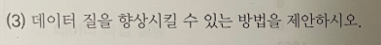

In [57]:
df_filled.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable'],
      dtype='object')

In [60]:
#결측치 대체 : 위에서 KNN으로 완료


#이상치 대체
outlier_col = ['lead_time', 'stays_in_weekend_nights','stays_in_week_nights', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'adr']
for feature in outlier_col:
    q1 = df_filled[feature].quantile(0.25)
    q3 = df_filled[feature].quantile(0.75)
    iqr = q3 - q1
    iqr_w = iqr * 1.5
    min_d = df_filled[feature].min()
    max_d = df_filled[feature].max()
    
    df_filled[feature] = df_filled[feature].apply(lambda x : (q1 - iqr_w) if ((min_d < (q1 - iqr_w)) & (x < (q1 - iqr_w)))
                                                            else (min_d if ((min_d > (q1 - iqr_w)) & (x < (q1 - iqr_w)))
                                                            else ((q3 + iqr_w) if ((max_d > (q1 - iqr_w)) & (x > (q3 + iqr_w)))
                                                            else (max_d if ((max_d < (q1 - iqr_w)) & (x > (q3 + iqr_w)))
                                                            else x))))  

#스케일링 : 단위를 맞춰 학습을 향상시킬 수 있음(train /test 분리 필요)
from sklearn.model_selection import train_test_split

X = df_filled.drop(['is_canceled'], axis = 1)
y = df_filled['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1234)


from sklearn.preprocessing import MinMaxScaler


Mm = MinMaxScaler()

X_train_sc = Mm.fit_transform(X_train)
X_test_sc = Mm.transform(X_test)

#그룹화

변수 :  deposit_type
No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64


C:\Users\chaeyoung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


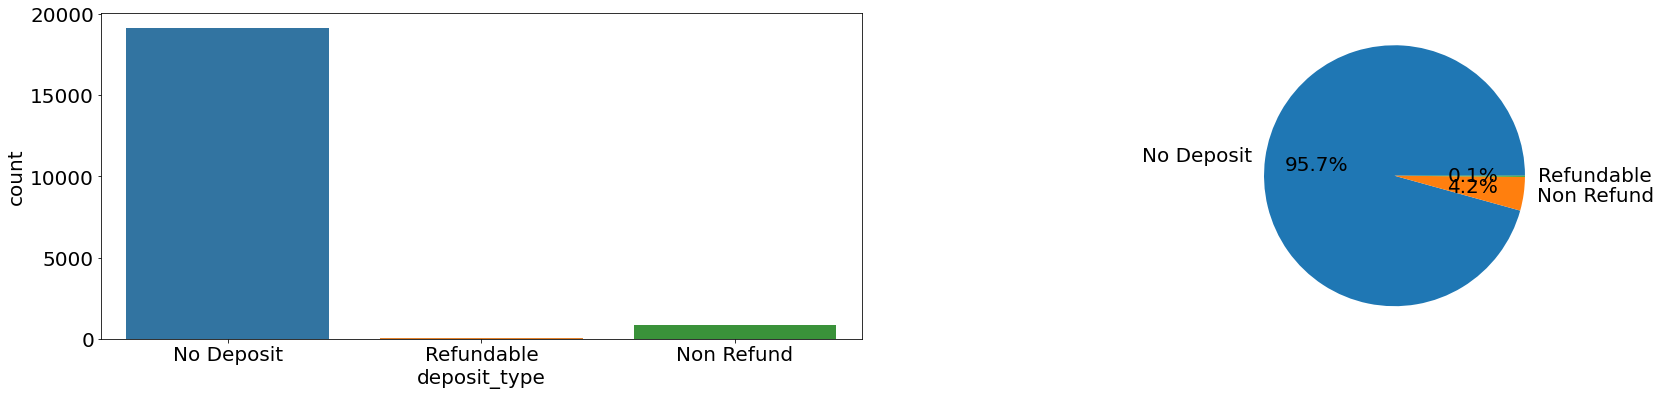

변수 :  is_canceled
0    17600
1     2400
Name: is_canceled, dtype: int64


C:\Users\chaeyoung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


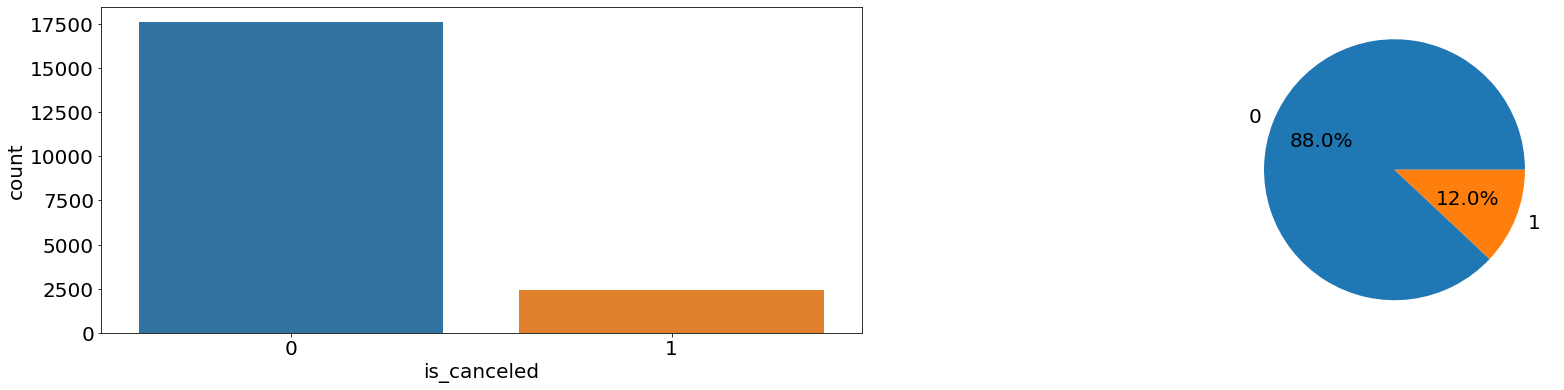

변수 :  is_repeated_guest
0.0    18893
1.0      749
Name: is_repeated_guest, dtype: int64


C:\Users\chaeyoung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


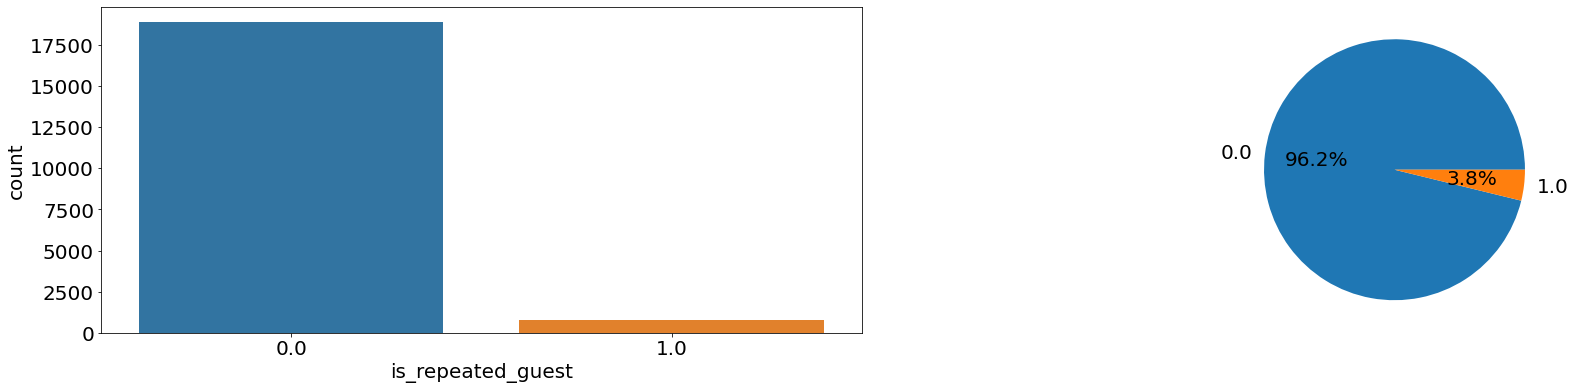

In [47]:
categorical_columns = ['deposit_type', 'is_canceled', 'is_repeated_guest']

for col in categorical_columns:
    X_col = df_h[col].copy()
    print('변수 : ', col)
    
    # 1.1 범주의 개수
    vc = X_col.value_counts()
    print(vc)
    
    plt.figure(figsize = (30, 6))
    plt.rc('font', size = 20)

    # 1.2  범주별 도수 : countplot
    plt.subplot(1, 2, 1)
    sns.countplot(X_col)
    
    # 1.3  범주의 비율 : Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(vc.values, labels=vc.index, autopct='%.1f%%')

    plt.show()

In [61]:
from imblearn.over_sampling import SMOTE

#smote
smote = SMOTE()
X_train_over_s, y_train_over_s = smote.fit_resample(X_train_sc, y_train)


import imblearn.over_sampling as osam

# 랜덤 오버샘플링
ros = osam.RandomOverSampler()
X_train_over_n, y_train_over_n = ros.fit_resample(X_train_sc, y_train)

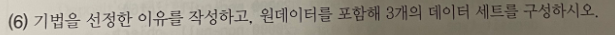

In [ ]:
#random sam(stratify)
X_train_sc , y_train

#smote
X_train_over_s , y_train_over_s

#random over sam
X_train_over_n , y_train_over_n

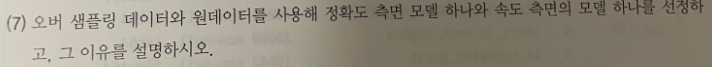

In [71]:
#속도 : 로지스틱 - random sam(stratify)
from sklearn.linear_model import LogisticRegression
model_lr_s1 = LogisticRegression()
model_lr_s1.fit(X_train_sc, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred = model_lr_s1.predict(X_test_sc)

conf_mx = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(conf_mx)
print('\n')
print('정확도 : {}%'.format(round(acc*100,2)))
print('정밀도 : {}%'.format(round(prc*100,2)))
print('재현율 : {}%'.format(round(rcll*100,2)))
print('f1 : {}%'.format(round(f1*100,2)))

[[5276    4]
 [ 467  253]]


정확도 : 92.15%
정밀도 : 98.44%
재현율 : 35.14%
f1 : 51.79%


In [72]:
#속도 : 로지스틱 - smote
from sklearn.linear_model import LogisticRegression
model_lr_s2 = LogisticRegression()
model_lr_s2.fit(X_train_over_s, y_train_over_s)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred = model_lr_s2.predict(X_test_sc)

conf_mx = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(conf_mx)
print('\n')
print('정확도 : {}%'.format(round(acc*100,2)))
print('정밀도 : {}%'.format(round(prc*100,2)))
print('재현율 : {}%'.format(round(rcll*100,2)))
print('f1 : {}%'.format(round(f1*100,2)))

[[4539  741]
 [ 365  355]]


정확도 : 81.57%
정밀도 : 32.39%
재현율 : 49.31%
f1 : 39.1%


In [73]:
#속도 : 로지스틱 - over sam
from sklearn.linear_model import LogisticRegression
model_lr_s3 = LogisticRegression()
model_lr_s3.fit(X_train_over_n, y_train_over_n)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred = model_lr_s3.predict(X_test_sc)

conf_mx = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(conf_mx)
print('\n')
print('정확도 : {}%'.format(round(acc*100,2)))
print('정밀도 : {}%'.format(round(prc*100,2)))
print('재현율 : {}%'.format(round(rcll*100,2)))
print('f1 : {}%'.format(round(f1*100,2)))

[[4500  780]
 [ 358  362]]


정확도 : 81.03%
정밀도 : 31.7%
재현율 : 50.28%
f1 : 38.88%


In [76]:
#정확도 : 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators = 100, min_samples_split = 5)
pred = clf1.fit(X_train_sc, y_train).predict(X_test_sc)

conf_mx = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(conf_mx)
print('\n')
print('정확도 : {}%'.format(round(acc*100,2)))
print('정밀도 : {}%'.format(round(prc*100,2)))
print('재현율 : {}%'.format(round(rcll*100,2)))
print('f1 : {}%'.format(round(f1*100,2)))

[[5252   28]
 [ 421  299]]


정확도 : 92.52%
정밀도 : 91.44%
재현율 : 41.53%
f1 : 57.12%


In [77]:
#정확도 : 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 100, min_samples_split = 5)
pred = clf2.fit(X_train_over_s, y_train_over_s).predict(X_test_sc)

conf_mx = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(conf_mx)
print('\n')
print('정확도 : {}%'.format(round(acc*100,2)))
print('정밀도 : {}%'.format(round(prc*100,2)))
print('재현율 : {}%'.format(round(rcll*100,2)))
print('f1 : {}%'.format(round(f1*100,2)))

[[4629  651]
 [ 346  374]]


정확도 : 83.38%
정밀도 : 36.49%
재현율 : 51.94%
f1 : 42.87%


In [78]:
#정확도 : 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators = 100, min_samples_split = 5)
pred = clf3.fit(X_train_over_n, y_train_over_n).predict(X_test_sc)

conf_mx = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(conf_mx)
print('\n')
print('정확도 : {}%'.format(round(acc*100,2)))
print('정밀도 : {}%'.format(round(prc*100,2)))
print('재현율 : {}%'.format(round(rcll*100,2)))
print('f1 : {}%'.format(round(f1*100,2)))

[[4967  313]
 [ 394  326]]


정확도 : 88.22%
정밀도 : 51.02%
재현율 : 45.28%
f1 : 47.98%


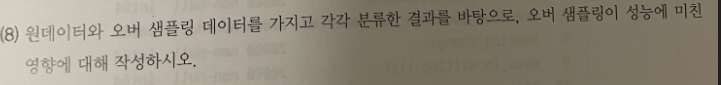

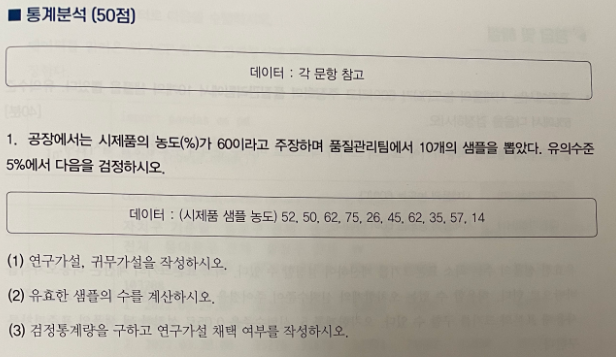

In [18]:
data= [52, 50, 62,75, 26,45, 62, 35, 57, 14]

1) 귀무가설 : 시제품의 농도는 60이다. 대립가설 : 시제품의 농도는 60이 아니다.

In [20]:
std = np.std(data)
mu = 60

In [21]:
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(data)
#정규성 만족

(0.965764582157135, 0.849041759967804)

In [22]:
stats.ttest_1samp(data, popmean = mu)

Ttest_1sampResult(statistic=-2.099292080780179, pvalue=0.06519313277276138)

In [26]:
x = np.mean(data)
n = 10

In [31]:
t = (x-60)/(std/np.sqrt(n-1)) #표본일때 n-1

In [32]:
t

-2.099292080780179

In [33]:
print(stats.t.ppf(0.025, 9)) #유의확률 컷, 자유도
print(stats.t.ppf(0.975, 9)) 

-2.262157162740992
2.2621571627409915


In [39]:
x_low = -2.262157162740992*(std/np.sqrt(n-1)) + 60
x_low

46.853512363470884

In [40]:
x_high = 2.2621571627409915*(std/np.sqrt(n-1)) + 60
x_high

73.14648763652912

In [35]:
stats.t.pdf(data, 9)

array([1.55895786e-13, 2.30451765e-13, 2.69828799e-14, 4.03644586e-15,
       1.51925435e-10, 6.58155632e-13, 2.69828799e-14, 8.00769543e-12,
       6.24206009e-14, 6.32869316e-08])

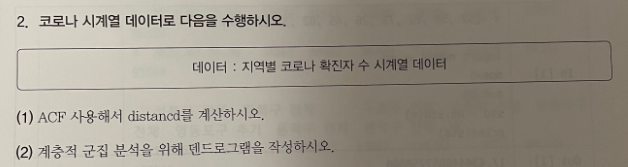

In [1]:
import pandas as pd
df_c_raw = pd.read_csv('./data/서울특별시 코로나19.csv')
df_c_raw.head()

날짜    종로구     중구    용산구    성동구    광진구   동대문구     중랑구     성북구  \
0  2022-03-30  37261  33753  55376  81018  96008  95433  103288  116862   
1  2022-03-29  36216  32835  53872  79030  93474  92993  100255  113609   
2  2022-03-28  35276  31878  52391  76802  91030  90277   97419  110583   
3  2022-03-27  34879  31577  51652  76108  89876  89302   96359  109500   
4  2022-03-26  34061  30903  50720  74178  87770  87345   93690  106437   

     강북구  ...     강서구     구로구    금천구    영등포구     동작구     관악구     서초구     강남구  \
0  75118  ...  148359  109973  63687  110293  106238  132305  104368  136200   
1  72934  ...  143573  106162  61840  106171  102955  127626  100529  132333   
2  70754  ...  139633  103573  59946  104109  100665  124805   98869  128813   
3  70003  ...  137908  102610  59393  102916   99426  123374   96873  126296   
4  68329  ...  134285   99938  57925  100349   96989  120413   95124  123992   

      송파구     강동구  
0  176765  121926  
1  172292  118842  
2  167386  115846  
3  165373  113549  
4  161650  110649  

[5 rows x 26 columns]

In [2]:
df_c = df_c_raw.copy()

In [3]:
print(df_c['날짜'].min())
print(df_c['날짜'].max())

2020-02-05
2022-03-30


In [4]:
df_c = df_c_raw.copy()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      785 non-null    object
 1   종로구     785 non-null    int64 
 2   중구      785 non-null    int64 
 3   용산구     785 non-null    int64 
 4   성동구     785 non-null    int64 
 5   광진구     785 non-null    int64 
 6   동대문구    785 non-null    int64 
 7   중랑구     785 non-null    int64 
 8   성북구     785 non-null    int64 
 9   강북구     785 non-null    int64 
 10  도봉구     785 non-null    int64 
 11  노원구     785 non-null    int64 
 12  은평구     785 non-null    int64 
 13  서대문구    785 non-null    int64 
 14  마포구     785 non-null    int64 
 15  양천구     785 non-null    int64 
 16  강서구     785 non-null    int64 
 17  구로구     785 non-null    int64 
 18  금천구     785 non-null    int64 
 19  영등포구    785 non-null    int64 
 20  동작구     785 non-null    int64 
 21  관악구     785 non-null    int64 
 22  서초구     785 non-null    in

In [5]:
df_c['날짜'] = pd.to_datetime(df_c['날짜'], format='%Y-%m-%d')

In [6]:
df_c.head()

날짜    종로구     중구    용산구    성동구    광진구   동대문구     중랑구     성북구    강북구  \
0 2022-03-30  37261  33753  55376  81018  96008  95433  103288  116862  75118   
1 2022-03-29  36216  32835  53872  79030  93474  92993  100255  113609  72934   
2 2022-03-28  35276  31878  52391  76802  91030  90277   97419  110583  70754   
3 2022-03-27  34879  31577  51652  76108  89876  89302   96359  109500  70003   
4 2022-03-26  34061  30903  50720  74178  87770  87345   93690  106437  68329   

   ...     강서구     구로구    금천구    영등포구     동작구     관악구     서초구     강남구     송파구  \
0  ...  148359  109973  63687  110293  106238  132305  104368  136200  176765   
1  ...  143573  106162  61840  106171  102955  127626  100529  132333  172292   
2  ...  139633  103573  59946  104109  100665  124805   98869  128813  167386   
3  ...  137908  102610  59393  102916   99426  123374   96873  126296  165373   
4  ...  134285   99938  57925  100349   96989  120413   95124  123992  161650   

      강동구  
0  121926  
1  118842  
2  115846  
3  113549  
4  110649  

[5 rows x 26 columns]

In [7]:
df_c_in = df_c.set_index('날짜')

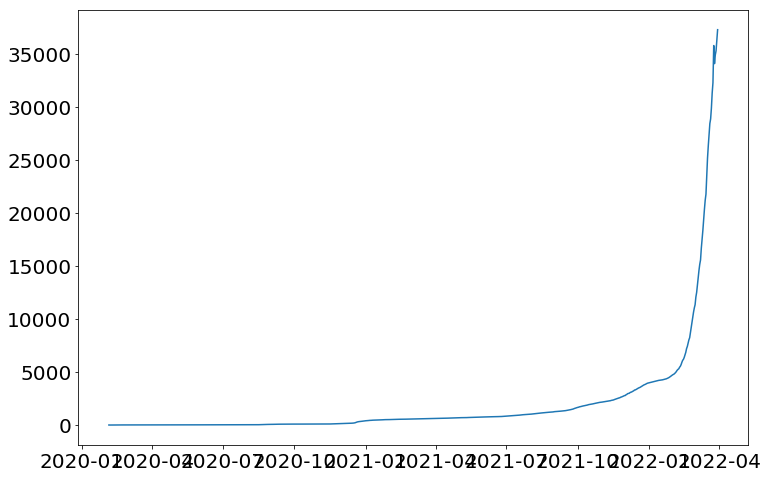

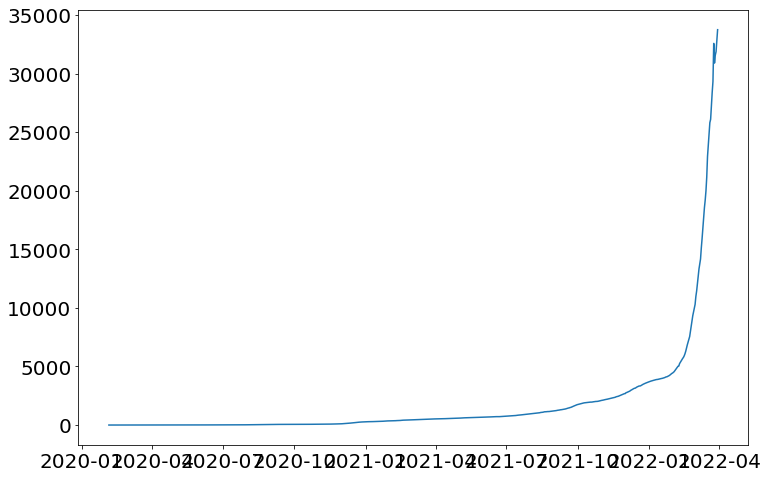

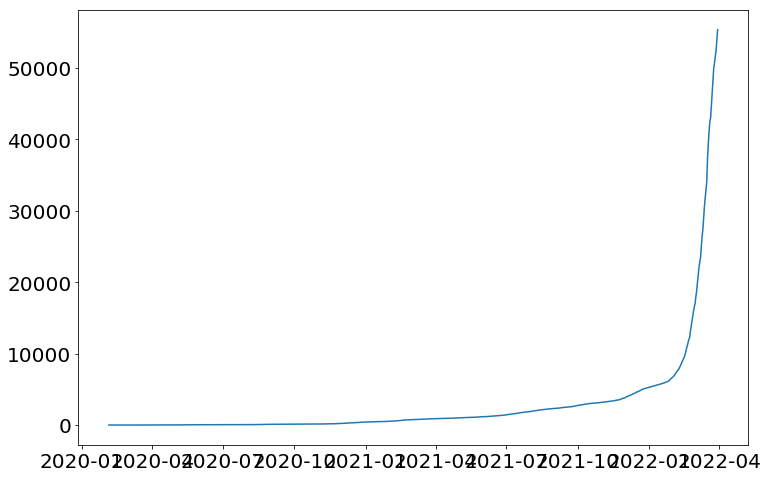

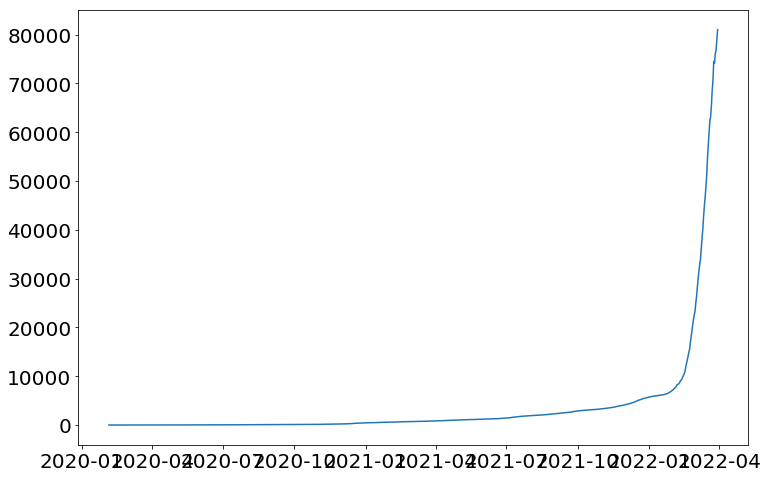

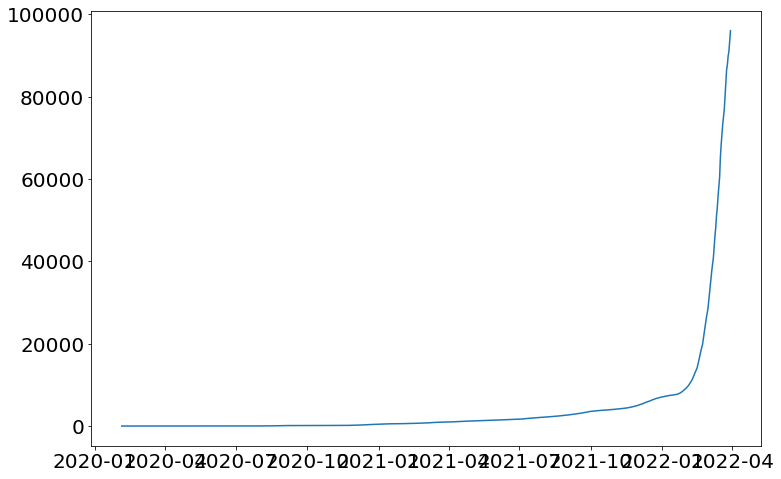

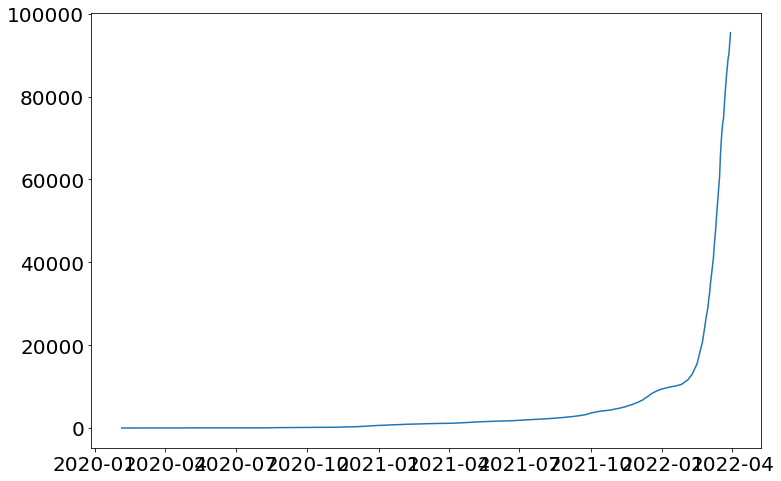

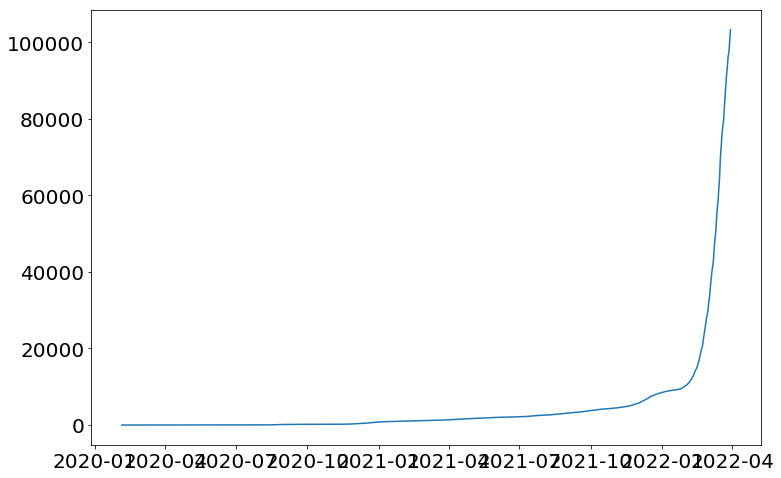

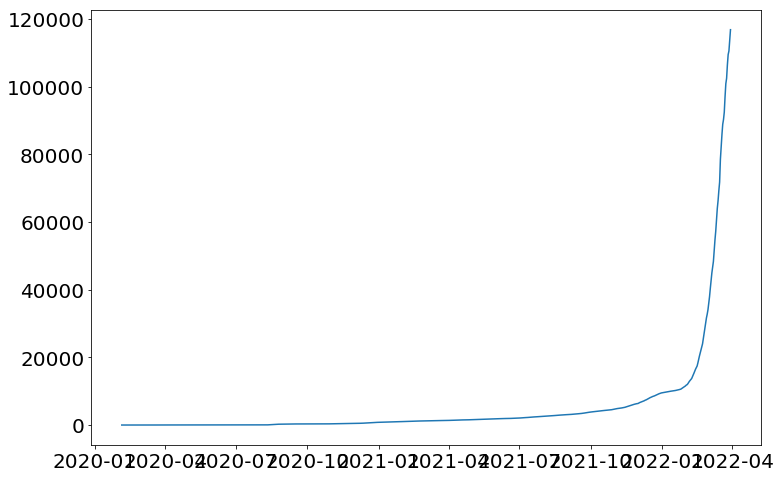

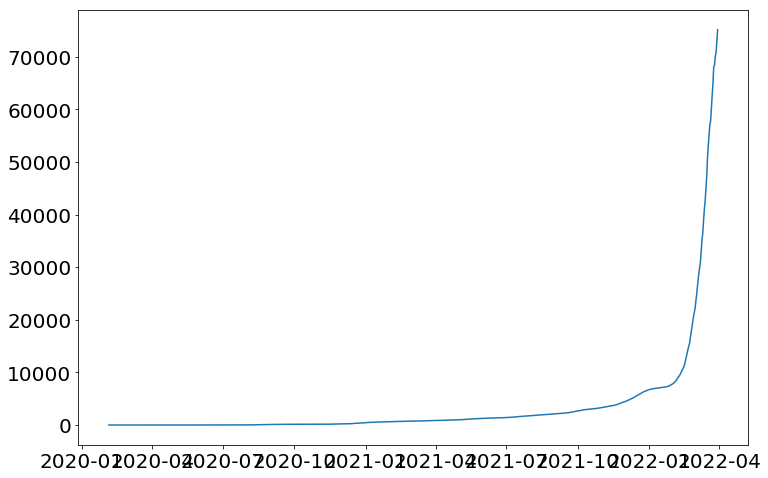

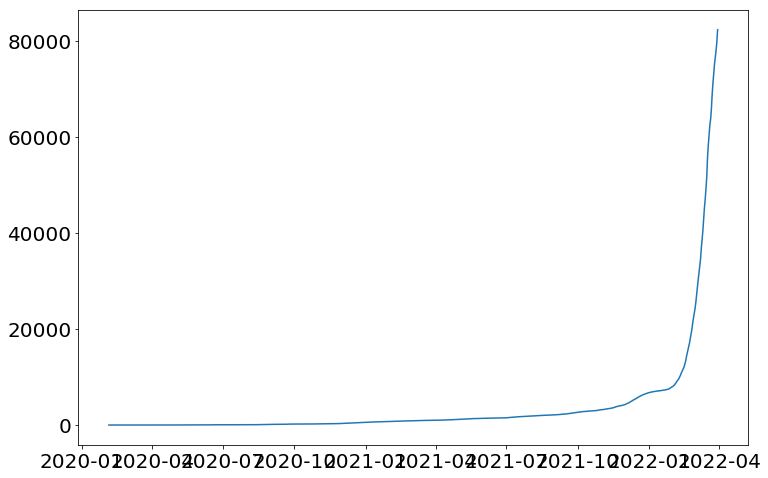

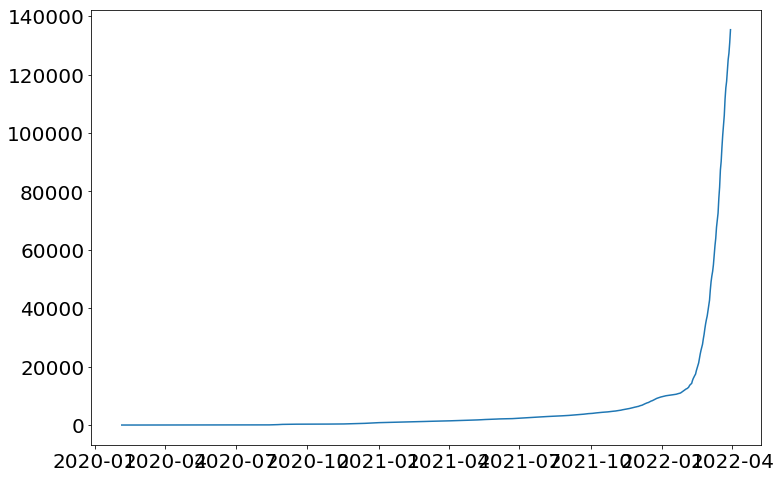

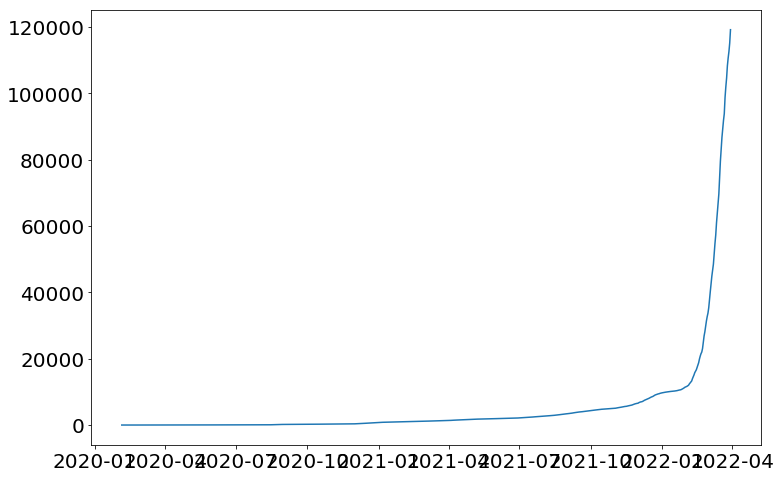

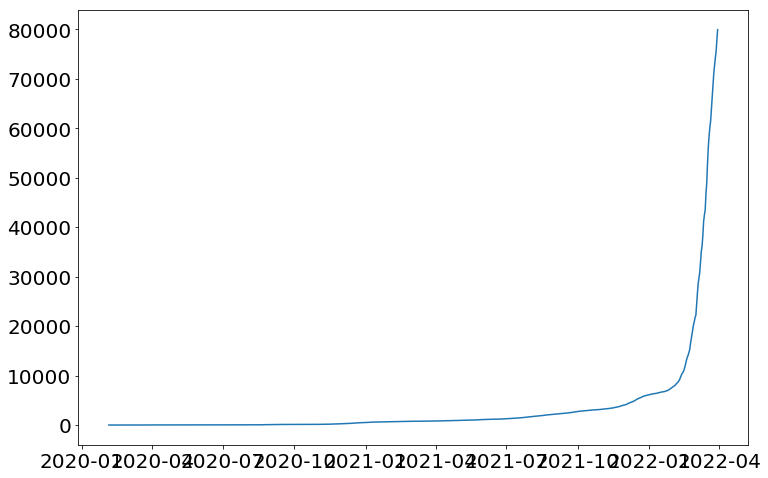

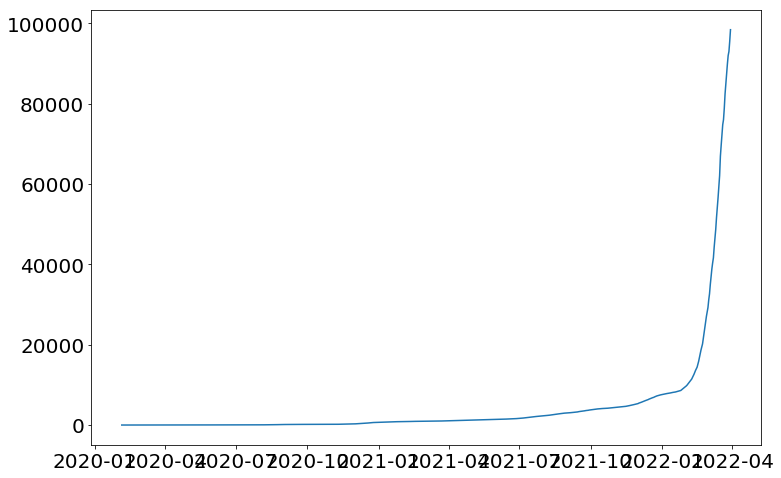

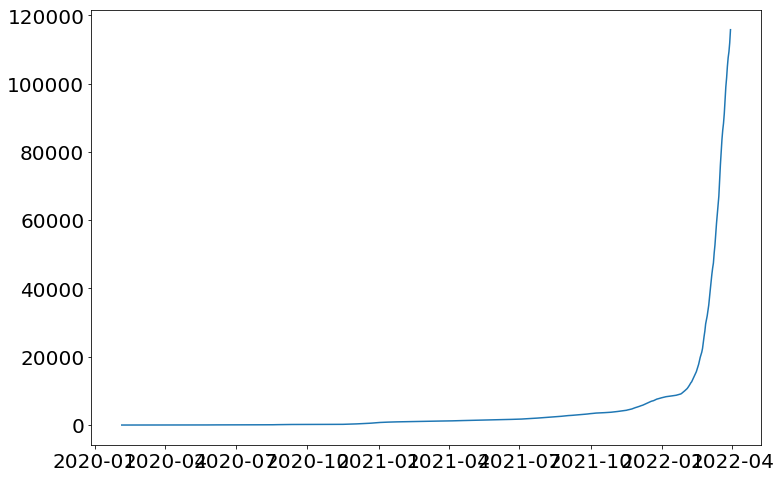

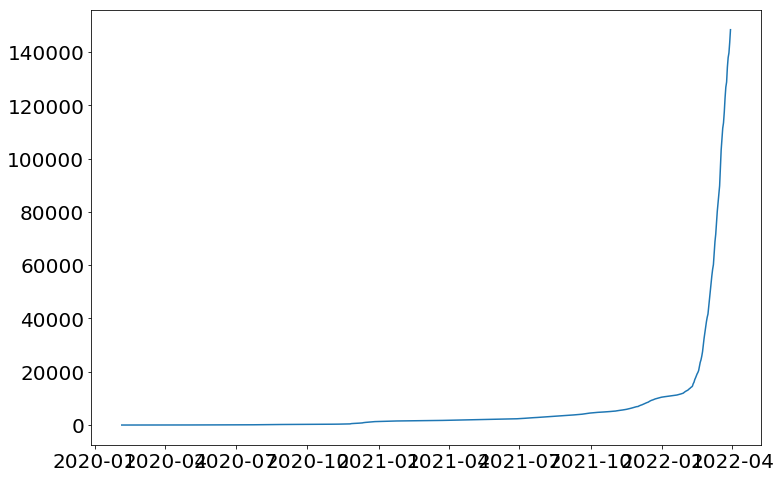

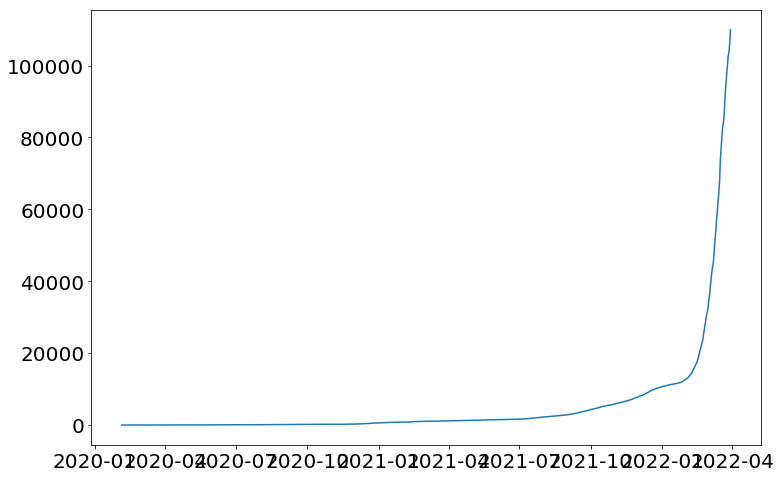

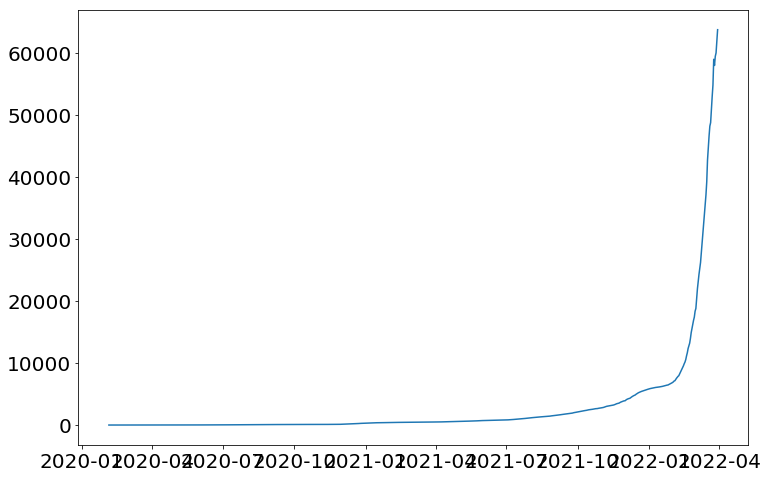

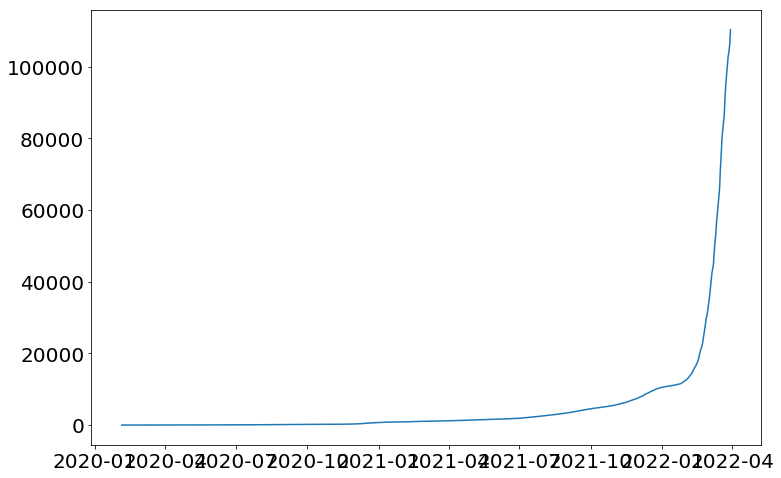

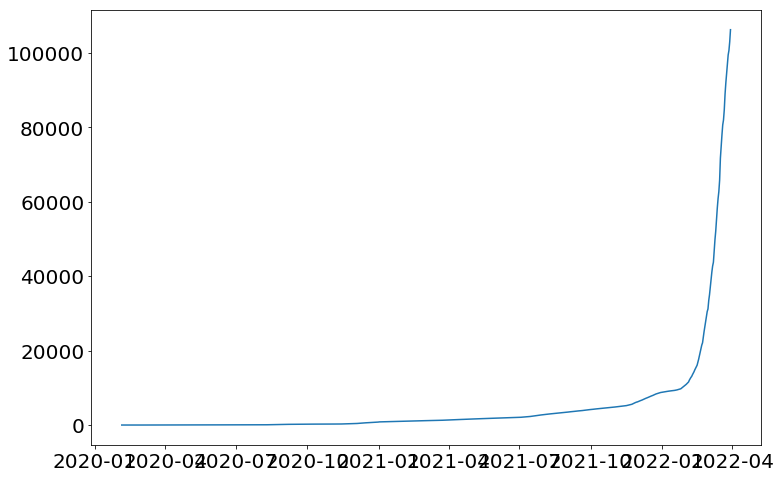

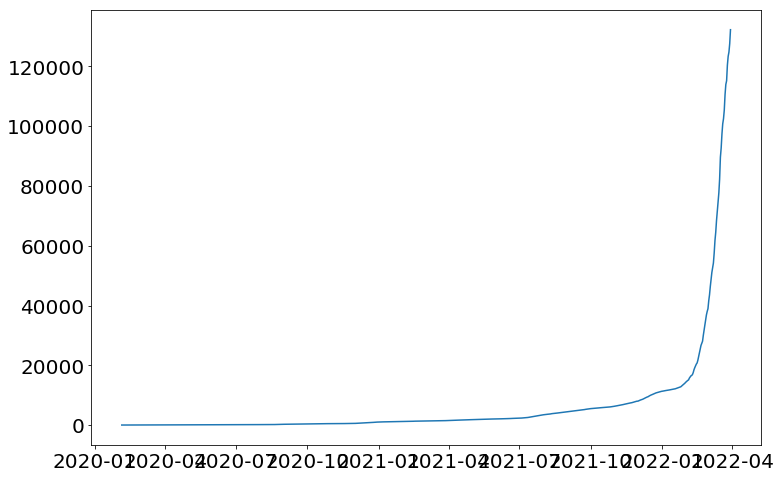

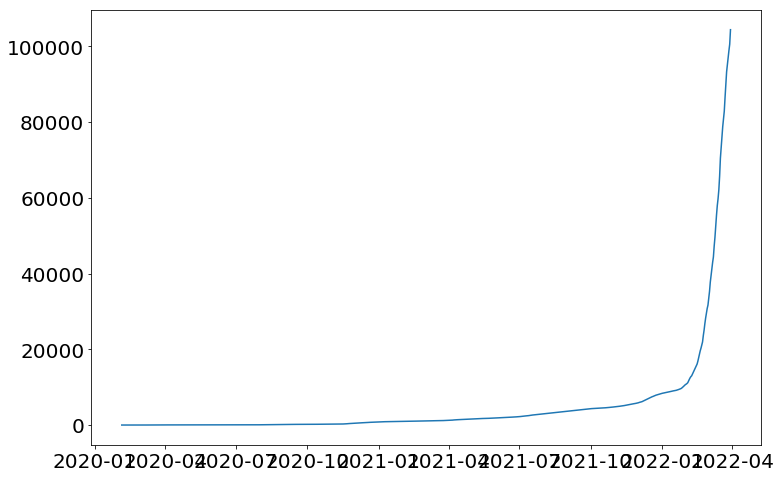

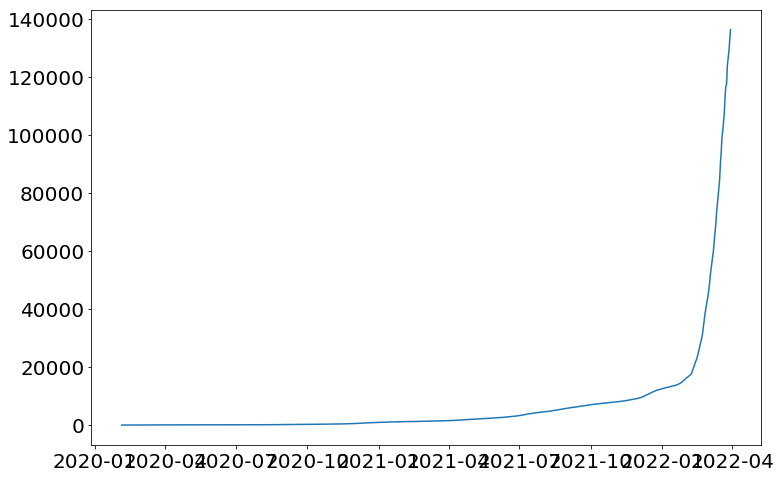

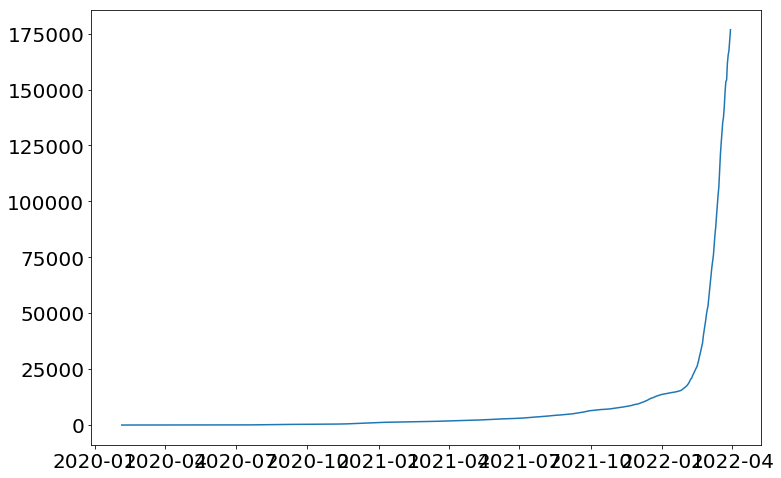

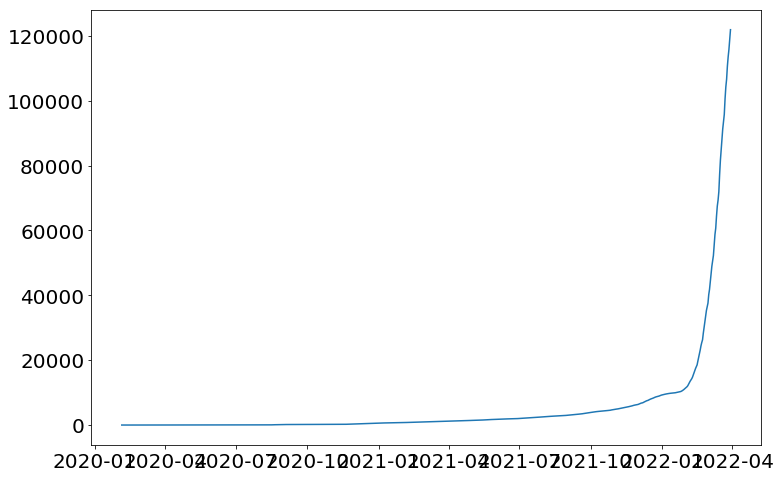

In [57]:
region = df_c_in.columns
for feature in region:
    plt.plot(df_c_in.index, df_c_in[feature])
    plt.show()

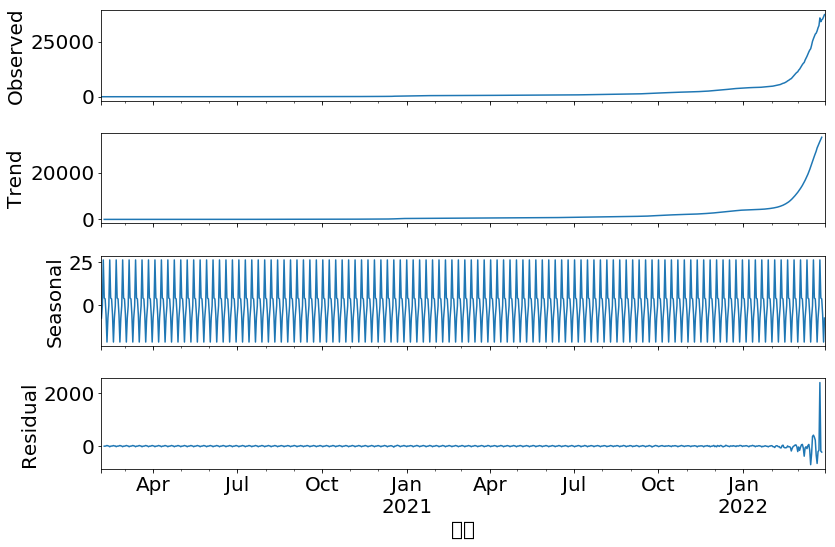

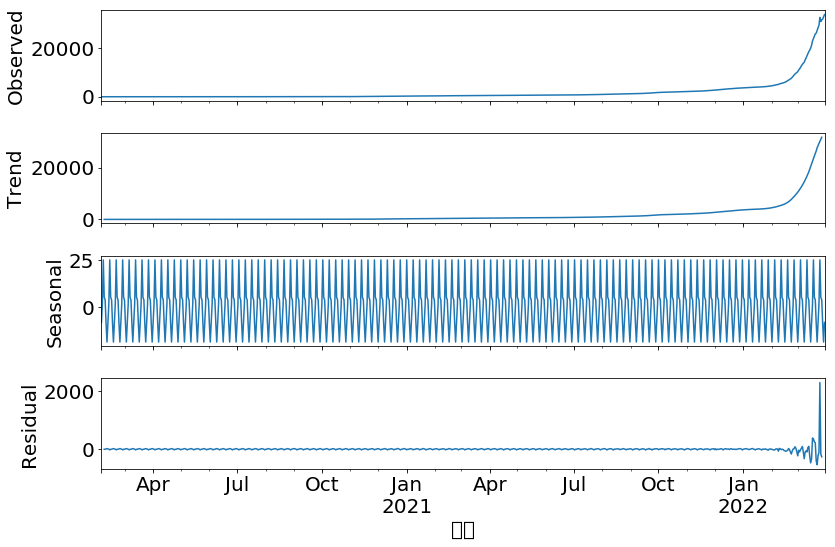

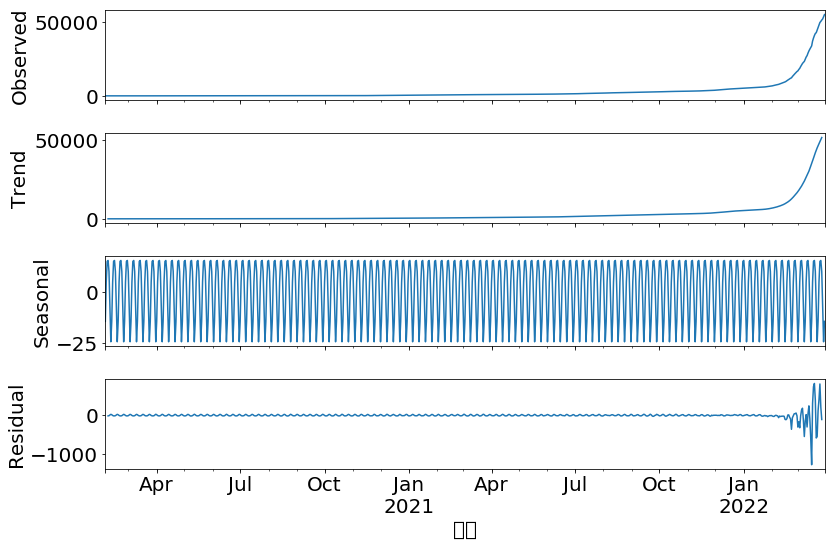

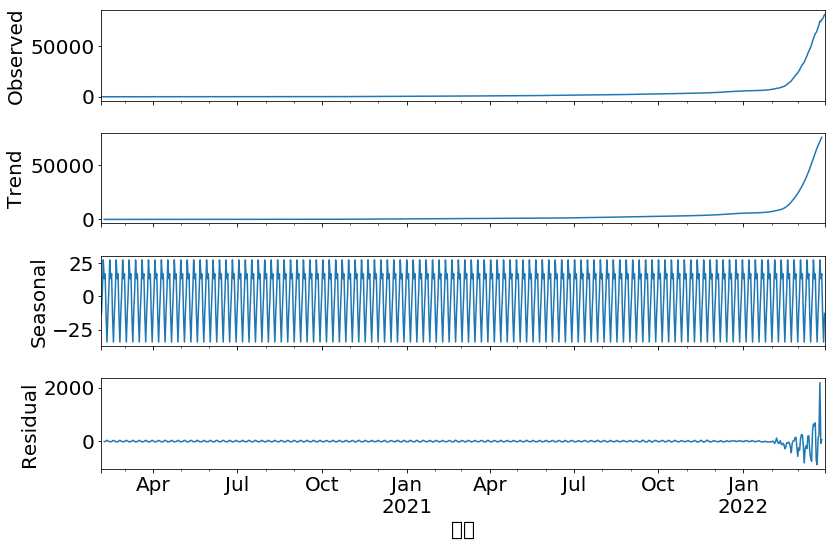

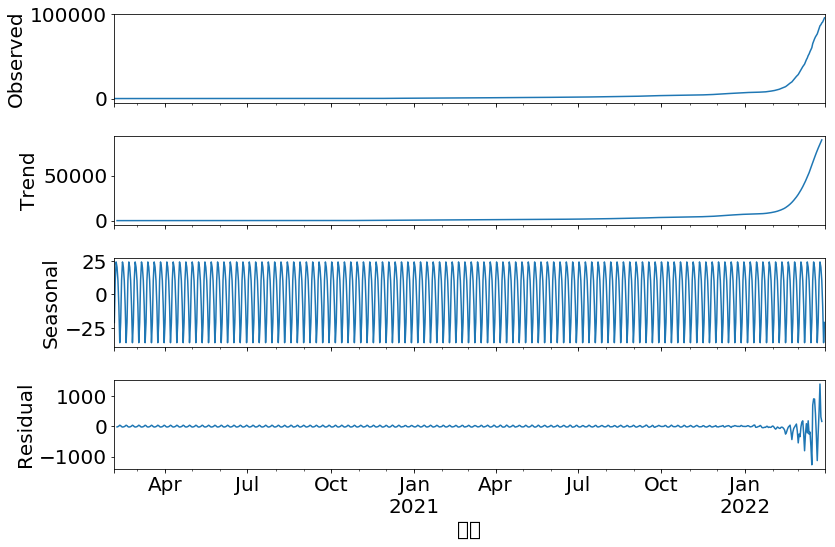

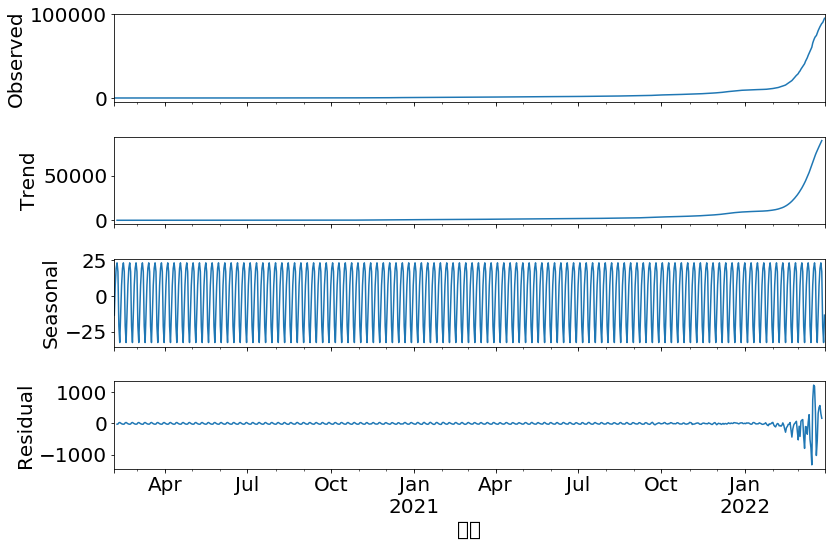

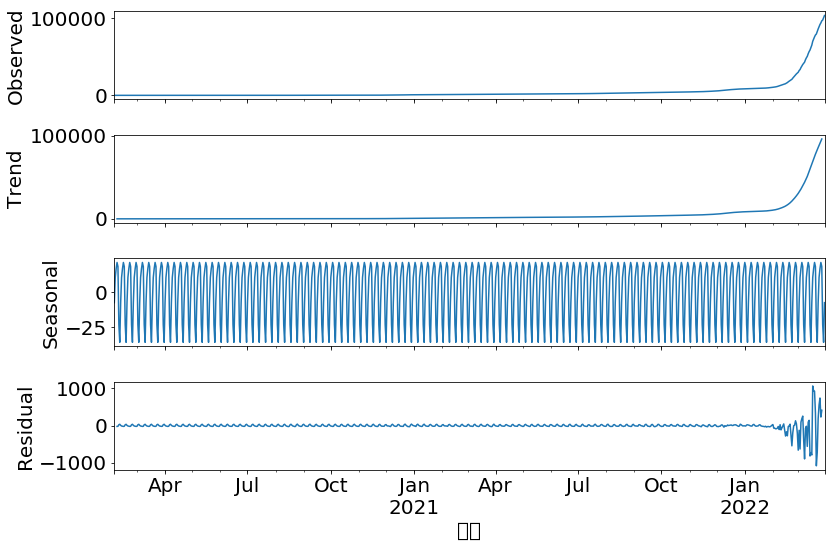

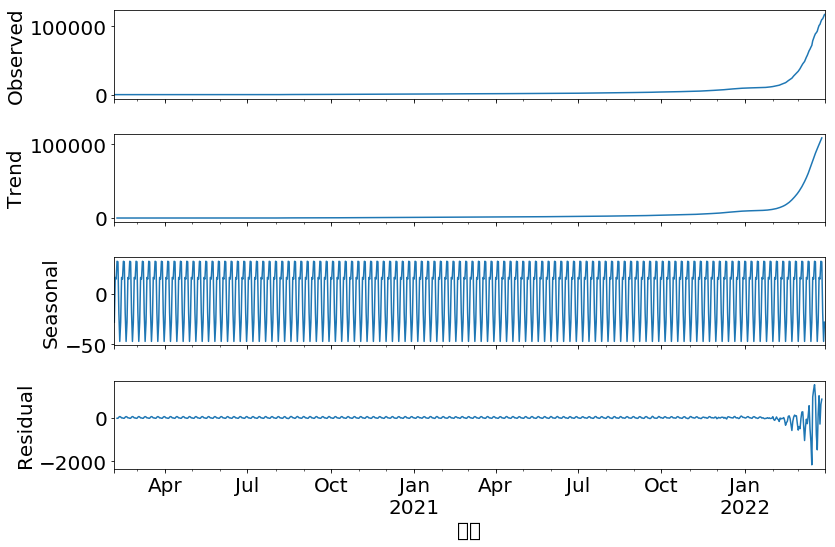

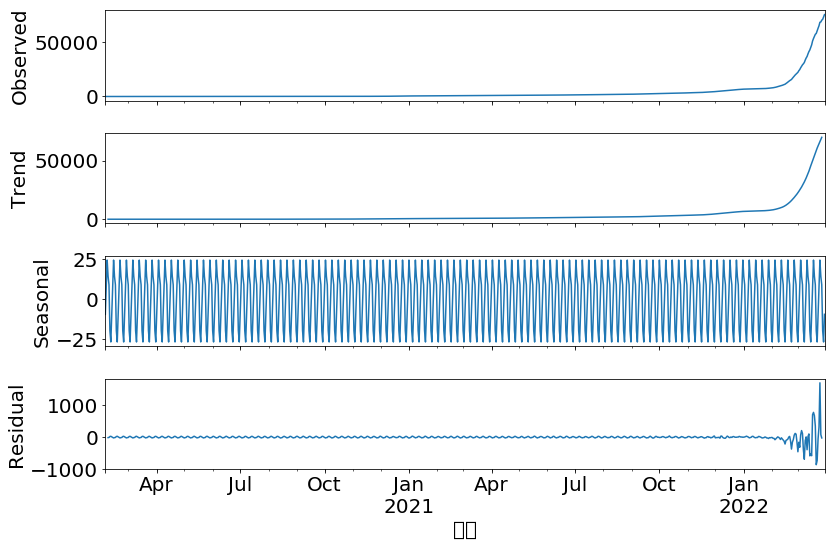

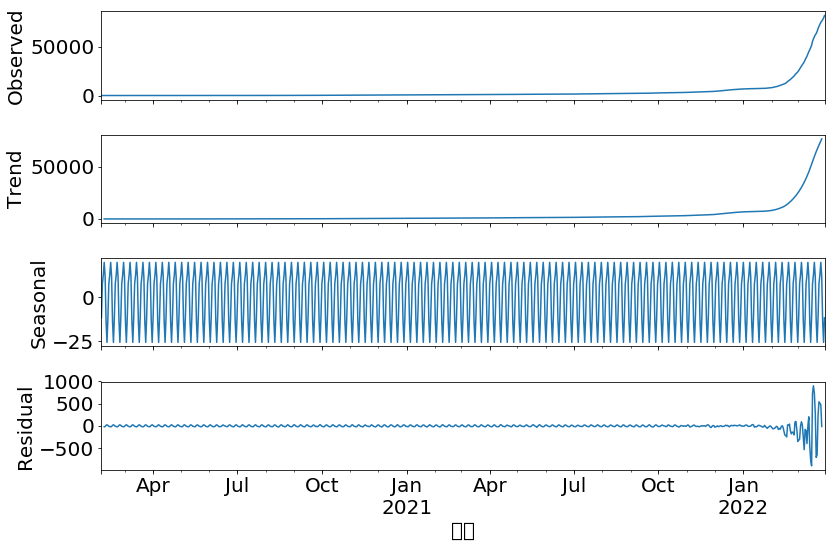

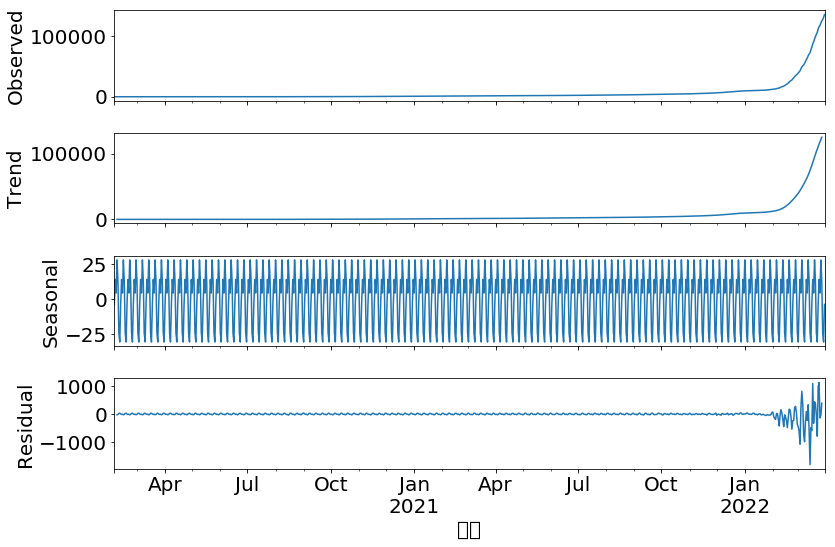

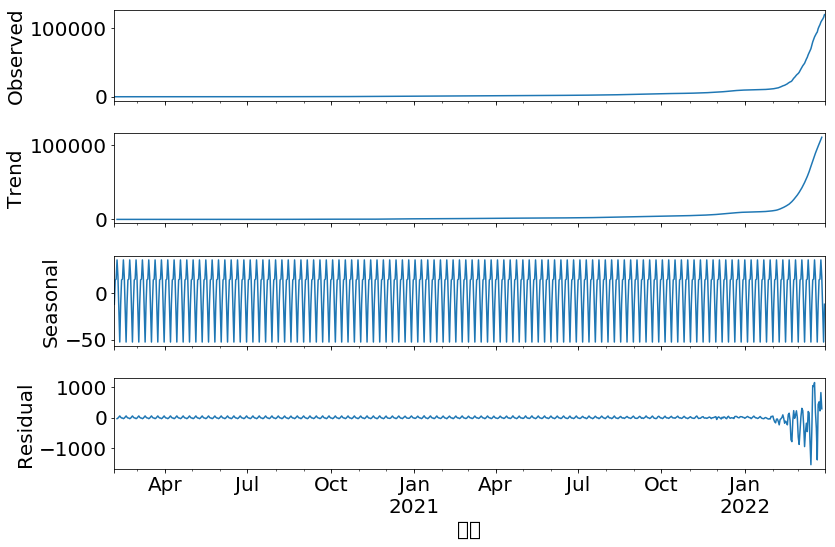

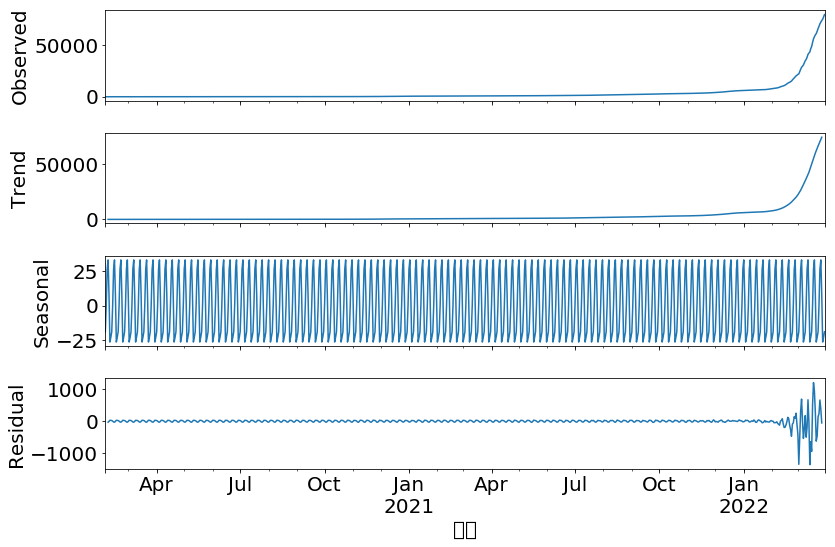

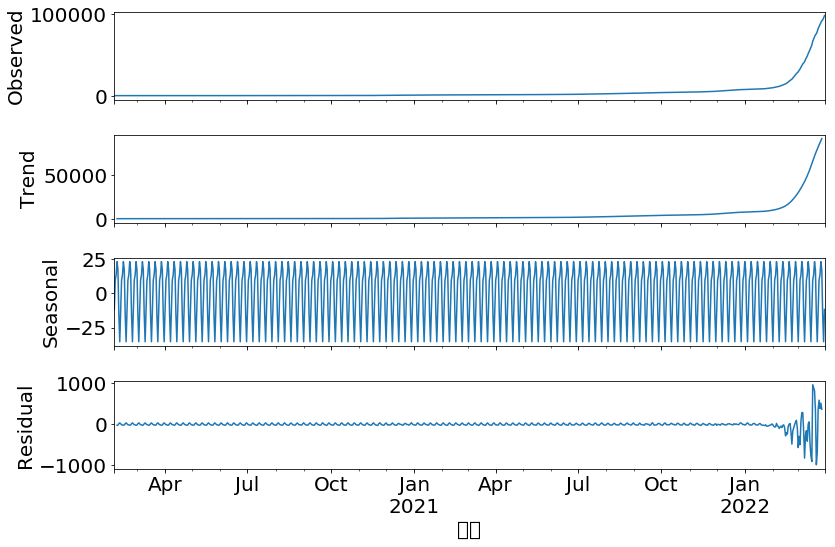

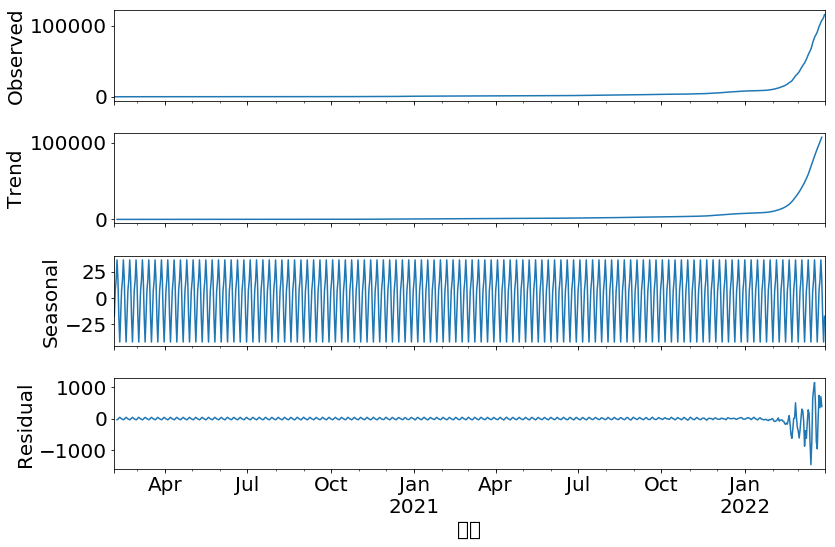

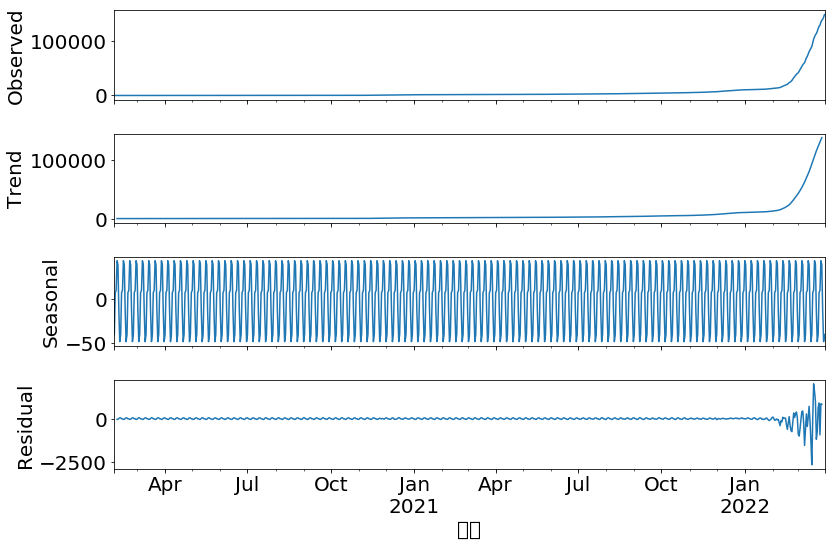

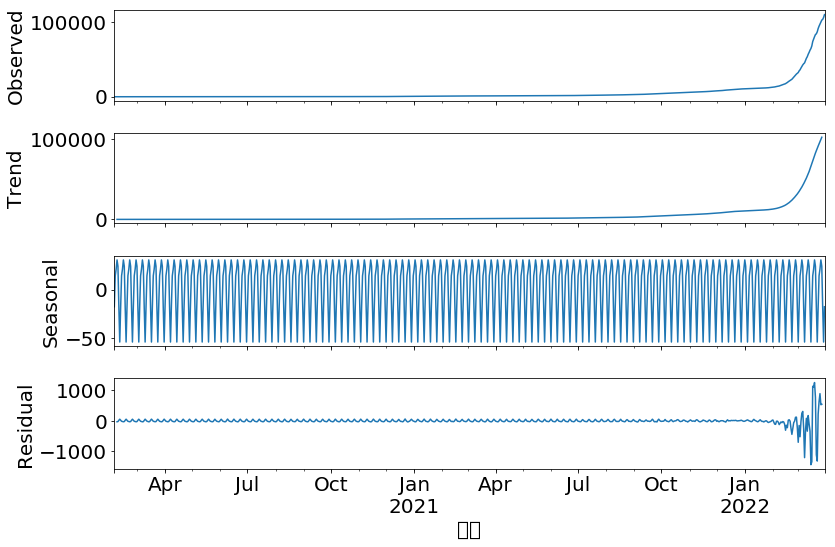

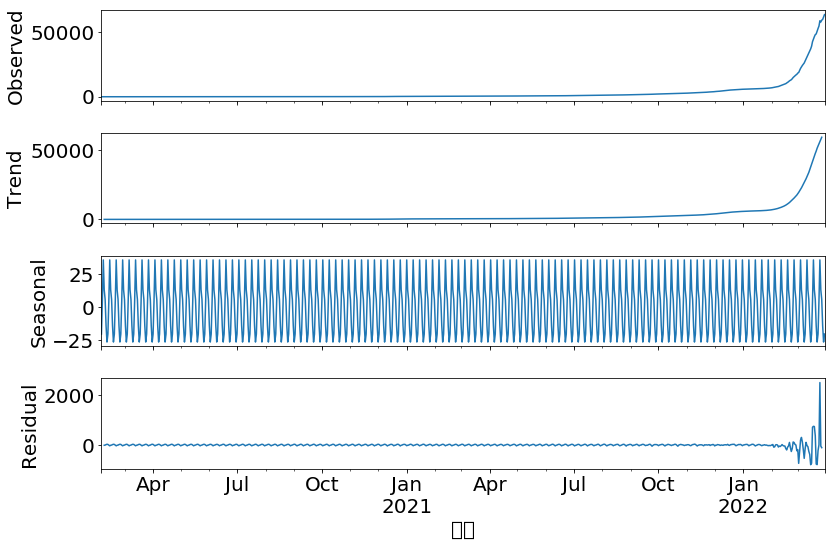

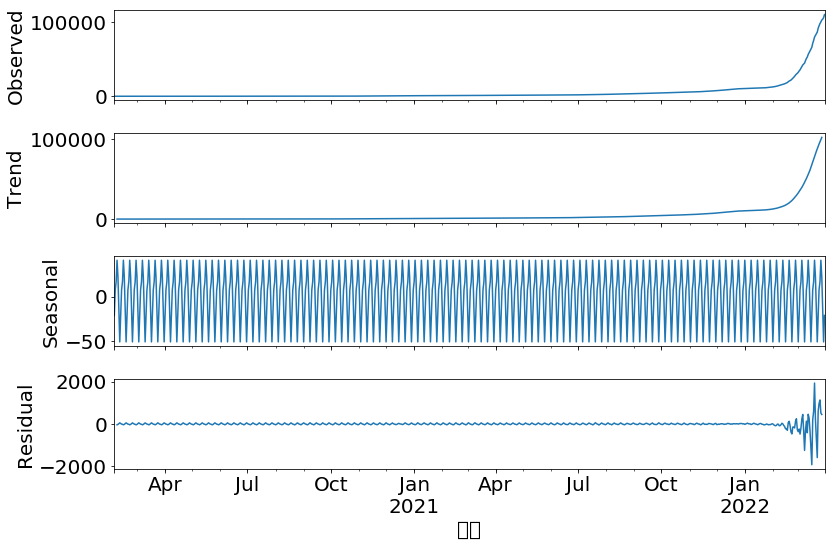

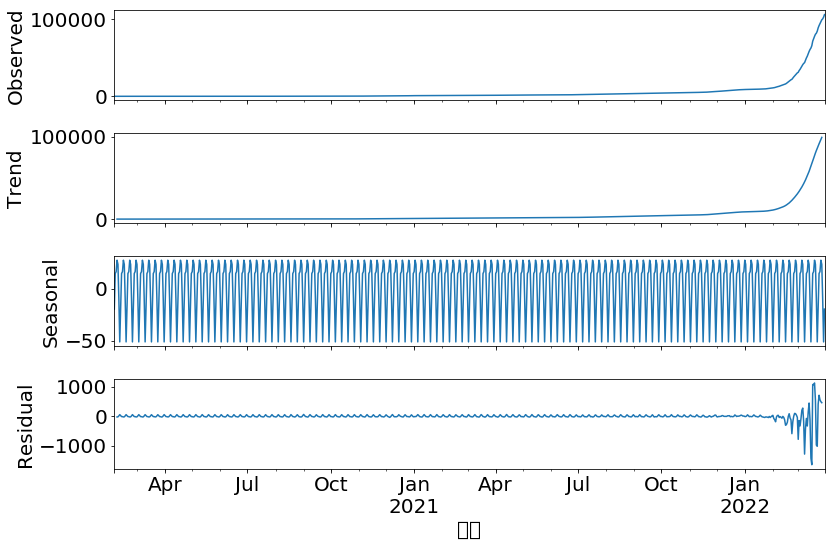

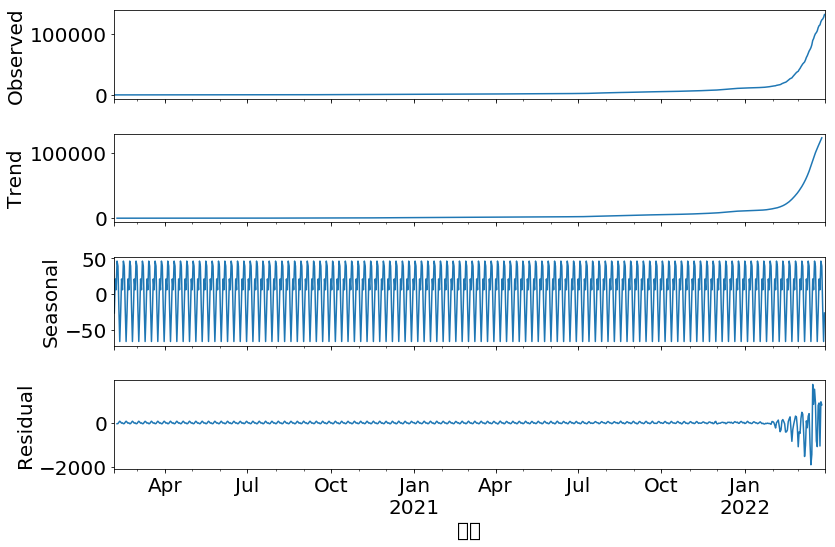

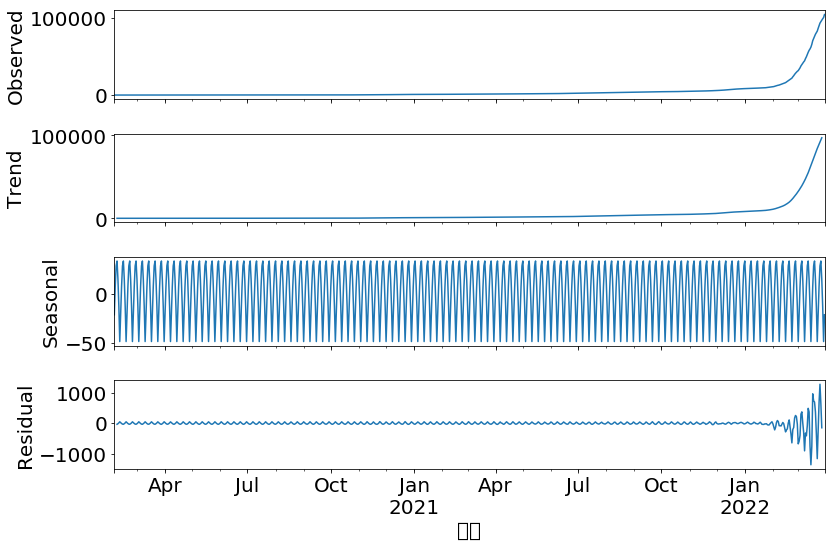

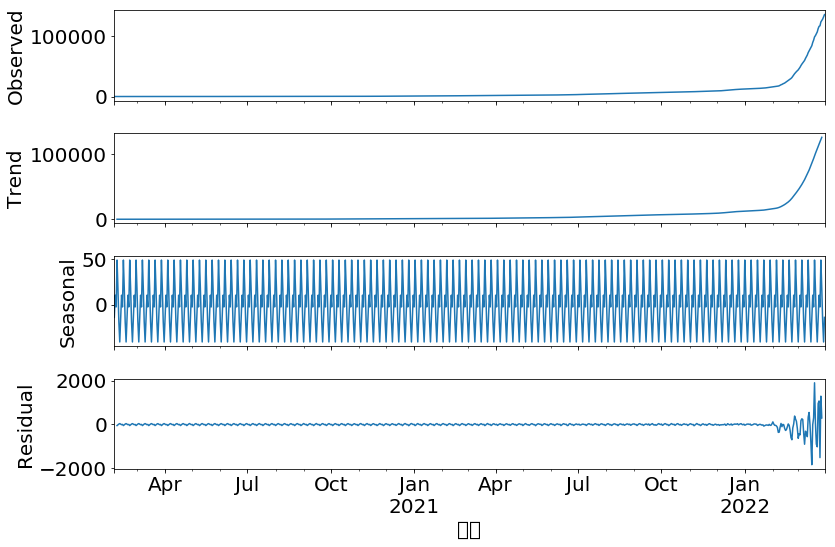

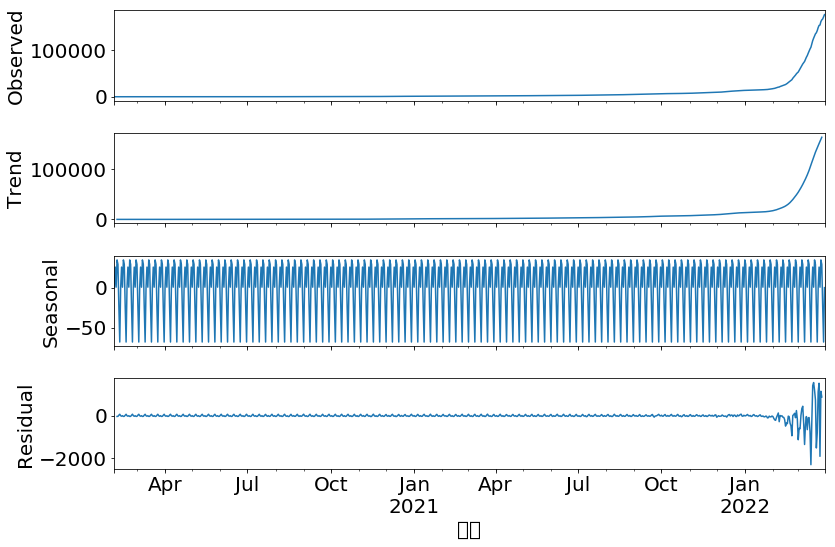

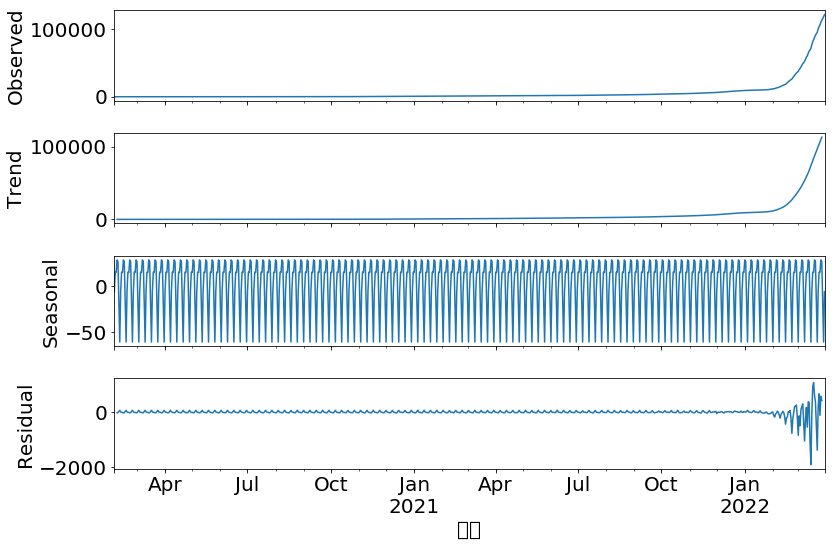

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
region = df_c_in.columns
for feature in region:
    ts = df_c_in[ feature]
    result = seasonal_decompose(ts, model = 'additive')
    plt.rcParams['figure.figsize'] = [12, 8]
    result.plot()
    plt.show()

In [9]:
import statsmodels.api as sm
import numpy as np
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags = n_lags)

n_lags = 20
lag_arr = np.repeat(n_lags, df_c_in.shape[1])
acf_list = list(map(acf, df_c_in.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = df_c_in.columns

C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [10]:
acf_df.head()

종로구        중구       용산구       성동구       광진구      동대문구       중랑구  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.965624  0.966025  0.965807  0.964843  0.965118  0.966179  0.964429   
2  0.932172  0.932933  0.932148  0.930035  0.930705  0.932781  0.929547   
3  0.899077  0.900435  0.899075  0.895739  0.896734  0.900063  0.895251   
4  0.865542  0.867391  0.865682  0.860691  0.862274  0.866781  0.860302   

        성북구       강북구       도봉구  ...       강서구       구로구       금천구      영등포구  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  0.964386  0.964873  0.964677  ...  0.963102  0.964896  0.964495  0.964211   
2  0.929349  0.930425  0.930168  ...  0.927079  0.930870  0.929726  0.929708   
3  0.894822  0.896665  0.895849  ...  0.891603  0.897198  0.895662  0.895164   
4  0.859554  0.862291  0.861332  ...  0.855502  0.862796  0.860914  0.860051   

        동작구       관악구       서초구       강남구       송파구       강동구  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  0.964682  0.964599  0.964920  0.965594  0.965216  0.964788  
2  0.930160  0.930349  0.931073  0.931913  0.930854  0.930000  
3  0.895834  0.896316  0.897017  0.898790  0.897147  0.895648  
4  0.860964  0.861660  0.863028  0.865697  0.862857  0.861294  

[5 rows x 25 columns]

In [11]:
acf_df_t = acf_df.transpose()
acf_df_t.head()

0         1         2         3         4         5         6   \
종로구  1.0  0.965624  0.932172  0.899077  0.865542  0.832363  0.794512   
중구   1.0  0.966025  0.932933  0.900435  0.867391  0.834610  0.796898   
용산구  1.0  0.965807  0.932148  0.899075  0.865682  0.832234  0.798381   
성동구  1.0  0.964843  0.930035  0.895739  0.860691  0.826010  0.789577   
광진구  1.0  0.965118  0.930705  0.896734  0.862274  0.828063  0.793461   

           7         8         9   ...        11        12        13  \
종로구  0.761958  0.729971  0.699409  ...  0.639936  0.611008  0.583066   
중구   0.764614  0.733020  0.702617  ...  0.643991  0.615546  0.587960   
용산구  0.765454  0.733336  0.702647  ...  0.642760  0.613361  0.585153   
성동구  0.755252  0.721447  0.689063  ...  0.625515  0.594684  0.564770   
광진구  0.759914  0.727410  0.696133  ...  0.634096  0.603830  0.574465   

           14        15        16        17        18        19        20  
종로구  0.556346  0.532175  0.510155  0.488437  0.467691  0.448092  0.429673  
중구   0.561398  0.537601  0.515414  0.494109  0.473484  0.454024  0.435871  
용산구  0.558548  0.535251  0.512457  0.490413  0.469171  0.449107  0.430530  
성동구  0.536119  0.509673  0.484347  0.460092  0.436576  0.414133  0.393233  
광진구  0.546269  0.520763  0.496003  0.472157  0.449579  0.427665  0.407140  

[5 rows x 21 columns]

In [12]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [13]:
ward = linkage(acf_df_t.iloc[:,:], metric = 'euclidean', method = 'ward')

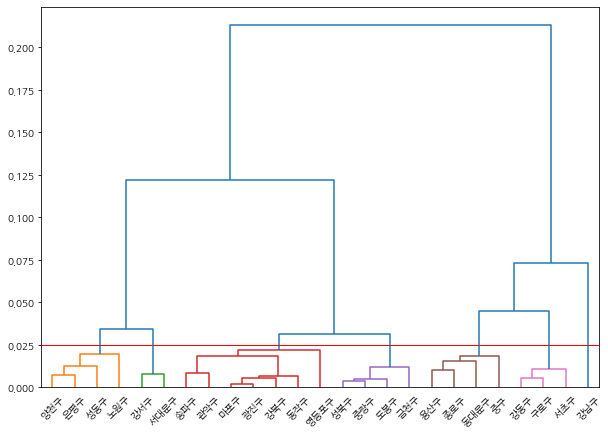

In [14]:
plt.figure(figsize = (10,7))
dendrogram(ward, orientation = 'top',
          labels = acf_df_t.index,
          distance_sort = 'descending',
          color_threshold = 0.025,
          show_leaf_counts = True)
plt.axhline(y = 0.025, color = 'r', linewidth = 1)
plt.show()

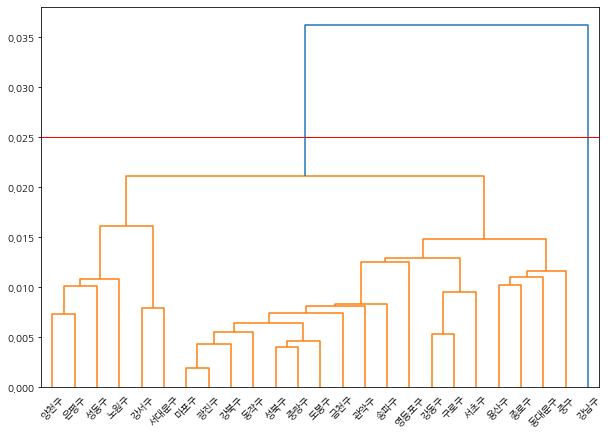

In [15]:
single = linkage(acf_df_t.iloc[:,:], metric = 'euclidean', method = 'single')
plt.figure(figsize = (10,7))
dendrogram(single, orientation = 'top',
          labels = acf_df_t.index,
          distance_sort = 'descending',
          color_threshold = 0.025,
          show_leaf_counts = True)
plt.axhline(y = 0.025, color = 'r', linewidth = 1)
plt.show()

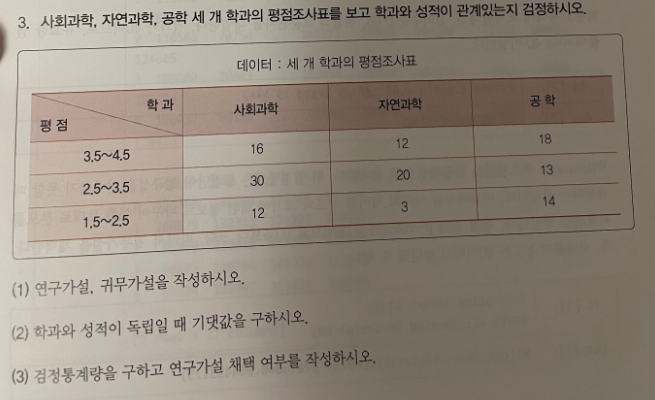

귀무가설 : 평점과 학과는 독립이다.
대립사설 : 평점과 학과는 독립이 아니다.

In [60]:
table = np.array([[16,12,18],
                             [30,20,13]
                            ,[12,3,14]])

In [62]:
import scipy.stats as stats
stats.chi2_contingency(table)

(10.199441509990177,
 0.03719883770303157,
 4,
 array([[19.33333333, 11.66666667, 15.        ],
        [26.47826087, 15.97826087, 20.54347826],
        [12.1884058 ,  7.35507246,  9.45652174]]))

In [41]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [42]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\chaeyoung\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [43]:
matplotlib.get_cachedir()

'C:\\Users\\chaeyoung\\.matplotlib'